### Perfiles de z50 adentro de rgal

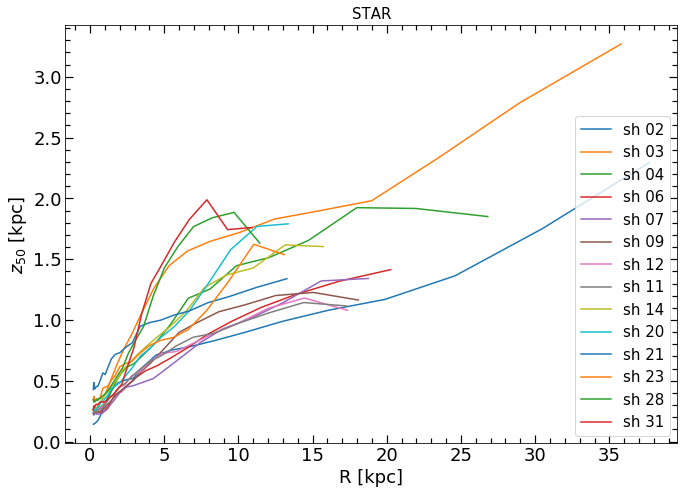

In [14]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import z50 as z50p

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.1, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/store/erebos/omarioni/_simulations/snap_127/'

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')
    
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]
    
    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < rgal )
    
    R = np.sqrt(xn[limit]**2+yn[limit]**2)
    z = zn[limit]
    m = mstr[limit]
    
    nbin = 25
    med, z50, nodos, p25, p75 = z50p.HMSH_log(R,z,m,nbin)
    
    ax.plot(med,z50, ls='-', label='sh '+Id)

ax.minorticks_on()
ax.tick_params( labelsize=18)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_xlim(0,14)
# ax.set_xscale('log')
ax.set_title('STAR', fontsize=15)
ax.set_ylabel('$z_{50}$ [kpc] ',fontsize=18)
ax.set_xlabel('R [kpc]',fontsize=18)
ax.legend(fontsize=15,fancybox=True)
# ax.arrow(0.22,0.3,0,-0.3,
#         length_includes_head=True, head_width=1./60, head_length=0.08,
#         lw=2,color='k') 

plt.show()
fig.savefig('../_imagenes/z50_perfil_lin.png',dpi=100, xxbox_inches='tight')

### z50 para el gas para todas las galaxias

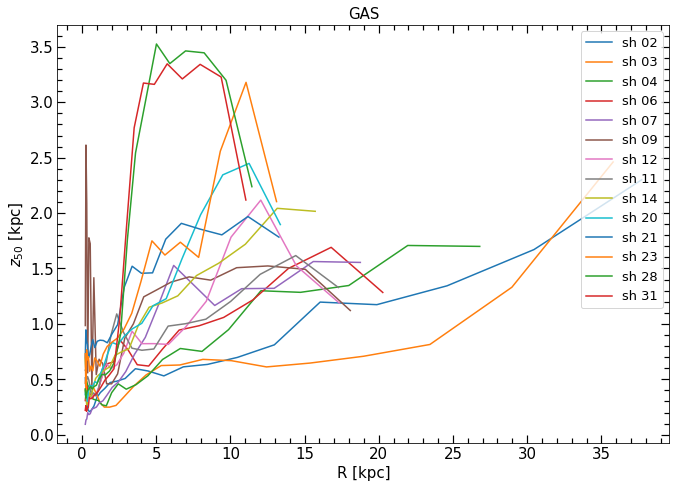

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

shID = np.loadtxt('../_data/my_halos.dat')[:,0]
Rvir = np.loadtxt('../_data/my_halos.dat')[:,2]
rgal=0.15*Rvir
data = np.loadtxt('../_data/time.dat')
s = data[:,0]
T = data[:,3]

ages = T.max() - T
# mask,  = np.where((ages >= 4) & (ages <=10))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.1, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)
    
for j in range(14):
    
    z50p = np.loadtxt('../_data/gas_z50/gas_z50_log_prof_sh_'+str('%d'%shID[j])+'.dat')
    med = z50p[:,0]
    z50 = z50p[:,1]
    snap = z50p[:,2]
    
    sin0, = np.where(z50 != 0)
    med  = med[sin0]
    z50  = z50[sin0]
    snap = snap[sin0]
    
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
    
    select, = np.where(snap == 127)
    ax.plot(med[select],z50[select], ls='-', label='sh '+Id)
    
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    # ax.set_ylim(-1.5,1.5)
    ax.set_title('GAS', fontsize=15)
    ax.set_ylabel('$z_{50}$ [kpc]',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
    ax.legend(fontsize=13,fancybox=True)

fig.savefig('../_imagenes/z50_perfil_gas.png',dpi=100, xxbox_inches='tight')
plt.show()

### Perfiles de z50 adentro de rgal - log-log

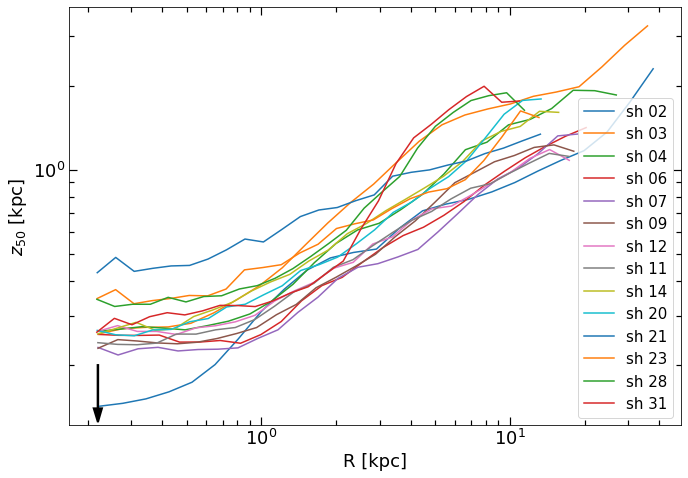

In [2]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import z50 as z50p

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.1, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/store/erebos/omarioni/_simulations/snap_127/'

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')
    
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]
    
    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < rgal )
    
    R = np.sqrt(xn[limit]**2+yn[limit]**2)
    z = zn[limit]
    m = mstr[limit]
    
    nbin = 25
    med, z50, nodos, p25, p75 = z50p.HMSH_log(R,z,m,nbin)
    
    ax.plot(med,z50, ls='-', label='sh '+Id)

ax.minorticks_on()
ax.tick_params( labelsize=18)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_xlim(0,14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$z_{50}$ [kpc] ',fontsize=18)
ax.set_xlabel('R [kpc]',fontsize=18)
ax.legend(fontsize=15,fancybox=True)
ax.arrow(0.22,0.2,0,-0.075,
        length_includes_head=True, head_width=1./60, head_length=0.015,
        lw=2,color='k') 

plt.show()
fig.savefig('../_imagenes/z50_perfil_log.png',dpi=100, xxbox_inches='tight')

### Perfiles de z50 adentro de rgal en bines de edad

subhalo_127000000000002


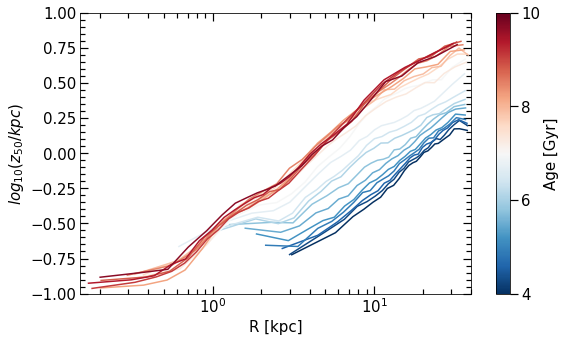

subhalo_127000000000003


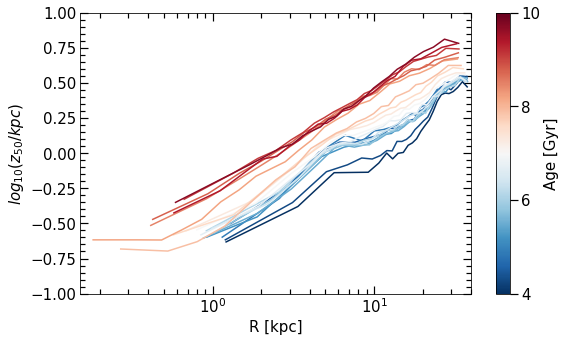

subhalo_127000000000004


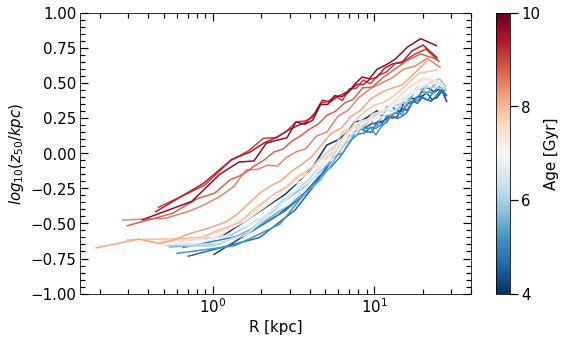

subhalo_127000000000006


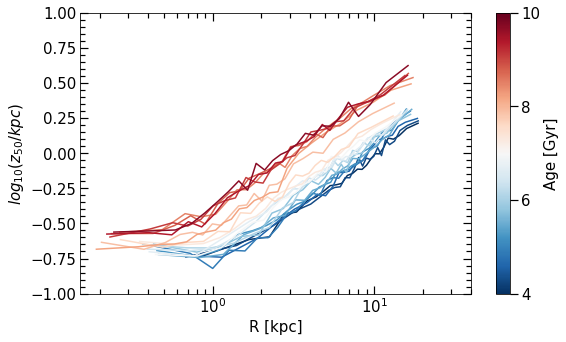

subhalo_127000000000007


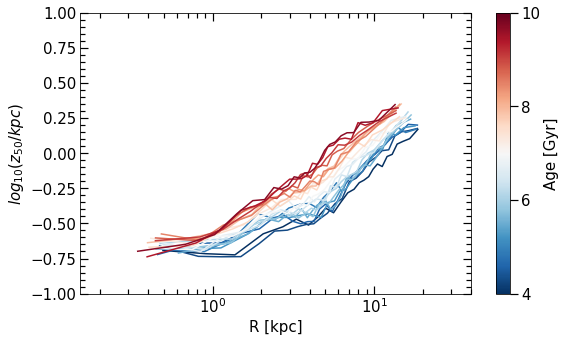

subhalo_127000000000009


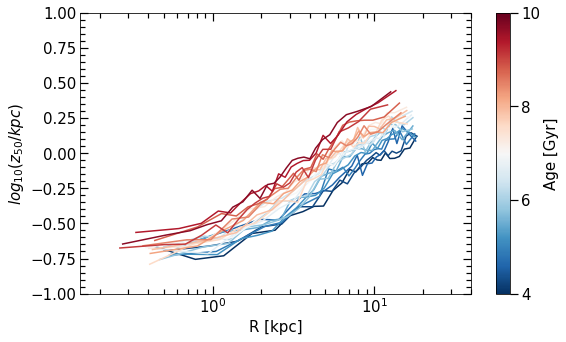

subhalo_127000000000012


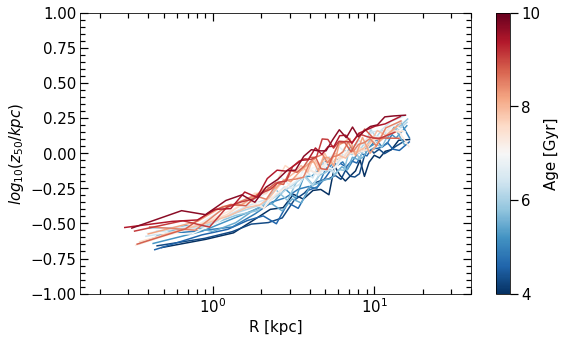

subhalo_127000000000011


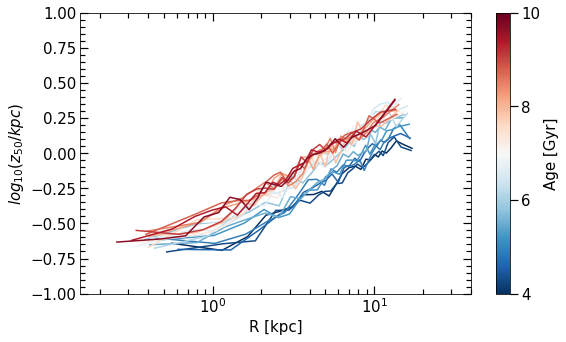

subhalo_127000000000014


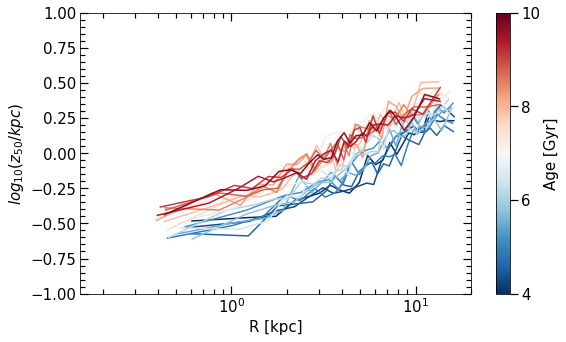

subhalo_127000000000020


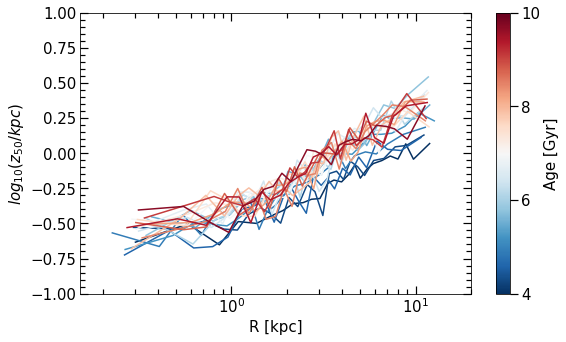

subhalo_127000000000021


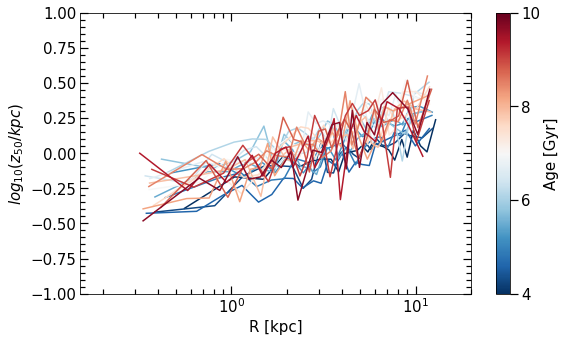

subhalo_127000000000023


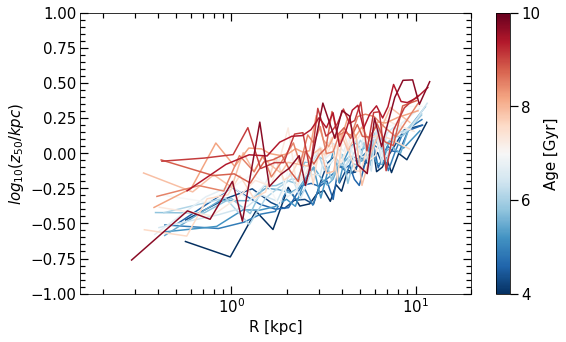

subhalo_127000000000028


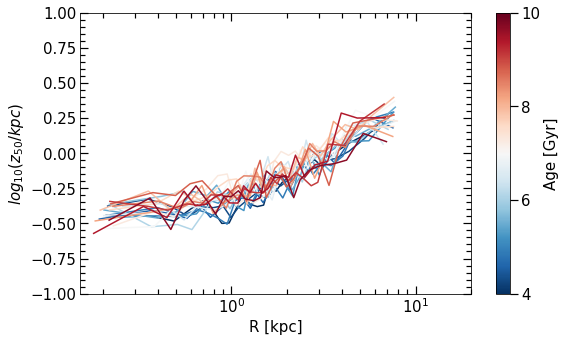

subhalo_127000000000031


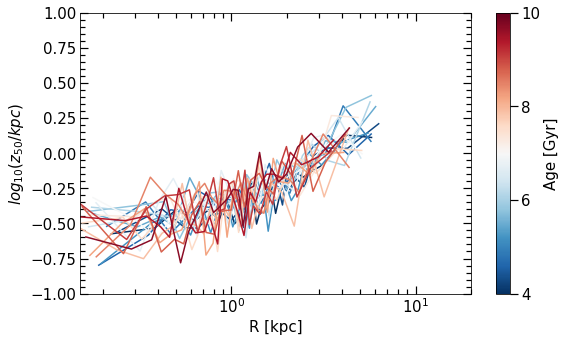

subhalo_127000000000030


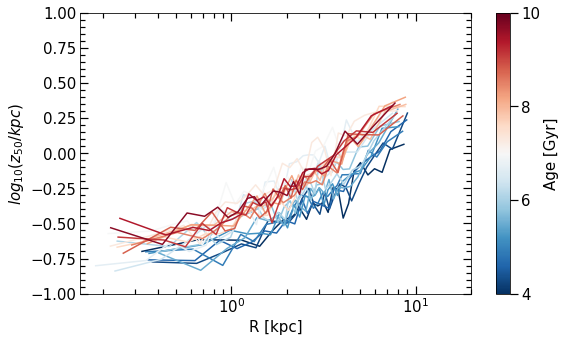

In [6]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import matplotlib as mpl
import z50

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')
    print('subhalo_'+str('%d'%ID[j]))

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < rgal )
    
    age_ = age[limit]

#     edades, = np.where((age_>4) & (age_<10))
    x_str = xn[limit]
    y_str = yn[limit]
    z_str = zn[limit]
    m_str = mstr[limit]
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)
    

    nb = 20
    
    delta = (10.-4.)/nb
    rango = np.arange(4,10,delta)
    
    
    color_range = np.linspace(4,10,nb)
    norm = mpl.colors.Normalize(vmin = color_range.min(),vmax= color_range.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'RdBu_r')
    
    for i in rango: 
        agelim, = np.where((age_>i) & (age_<i+delta))
        
        R = np.sqrt(x_str[agelim]**2 + y_str[agelim]**2)
        m = mstr[agelim]
        z = z_str[agelim]

        nbin = 25
        med, z_50 = z50.HMSH(R,z,m,nbin)
        
        ax.plot(med,np.log10(z_50), ls='-', color = cmap.to_rgba(i))
    
    cbar = fig.colorbar(cmap,ticks=[4,6,8,10]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    if j > 7:
        ax.set_xlim(0.15,20)
    else:
        ax.set_xlim(0.15,40)
    
    ax.set_xscale('log')
    ax.set_ylim(-1,1)
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    # ax.set_xlim(0,14)
    ax.set_ylabel('$log_{10}(z_{50}/kpc)$',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
#     ax.legend(fontsize=15,frameon=False)
    plt.show()
    fig.savefig('../_imagenes/z50_perfil/z50_subh_'+str('%d'%ID[j])+'.png',dpi=100, xxbox_inches='tight')

### Hago los z50 en bines de edad pero para todo el rango de edades

subhalo_127000000000002


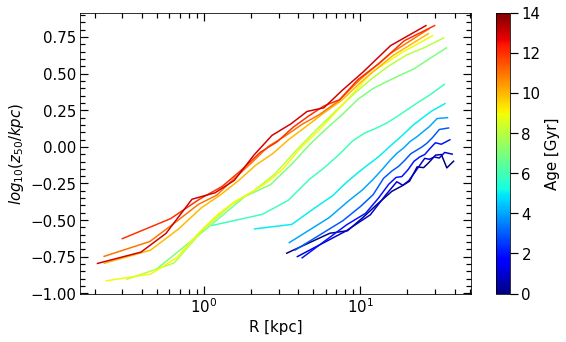

subhalo_127000000000003


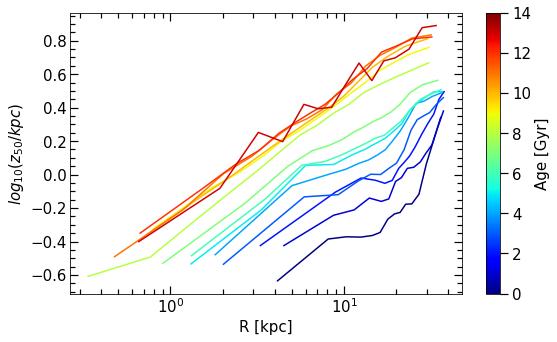

subhalo_127000000000004


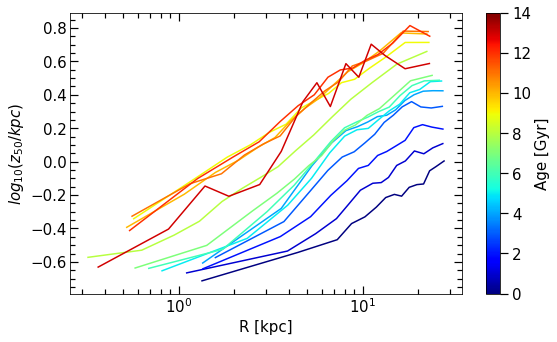

subhalo_127000000000006


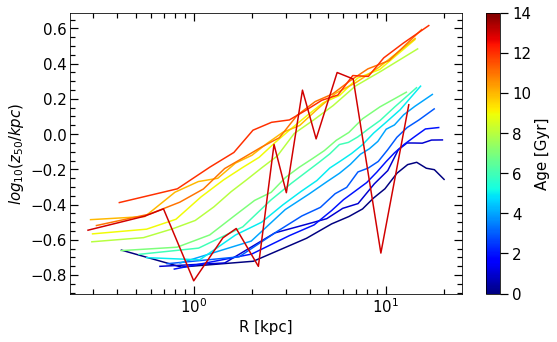

subhalo_127000000000007


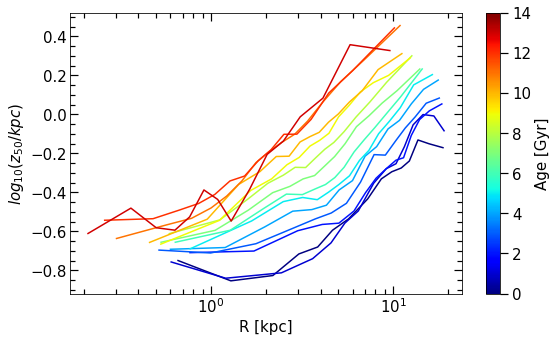

subhalo_127000000000009


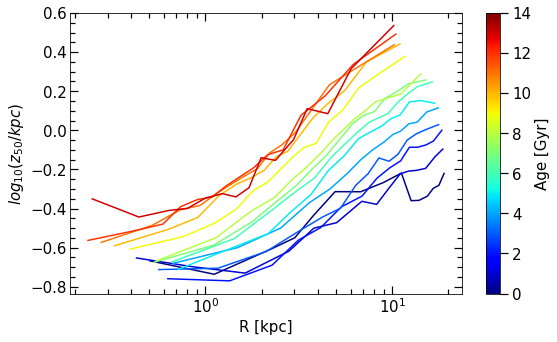

subhalo_127000000000012


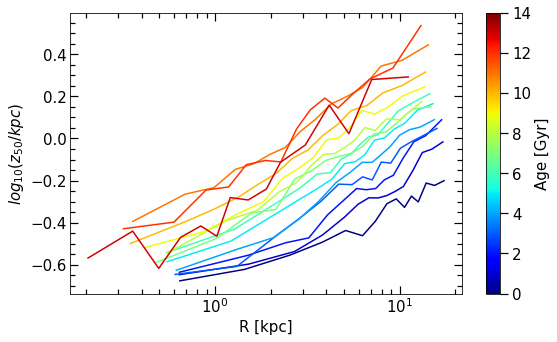

subhalo_127000000000011


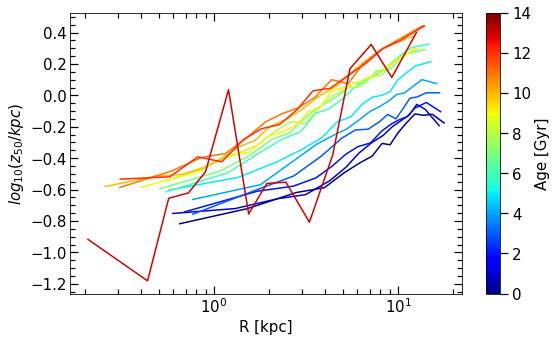

subhalo_127000000000014


/z/omarioni/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in log10


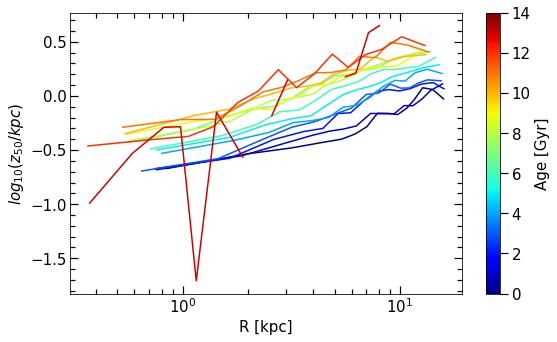

subhalo_127000000000020


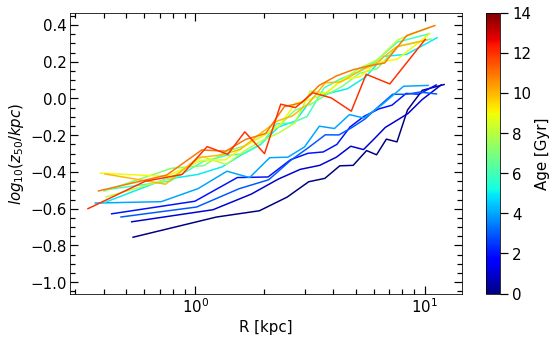

subhalo_127000000000021


/z/omarioni/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/z/omarioni/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


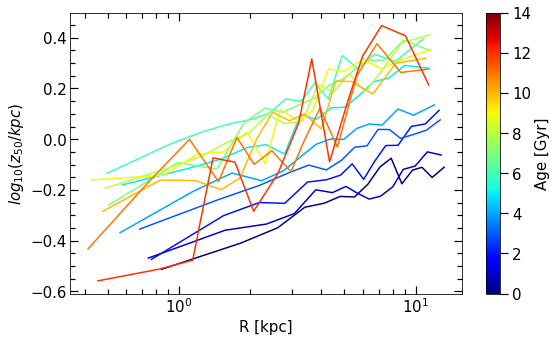

subhalo_127000000000023


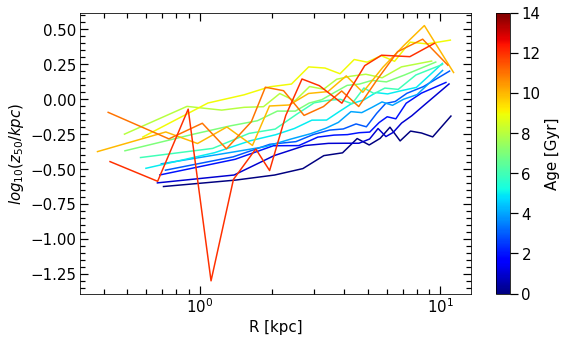

subhalo_127000000000028


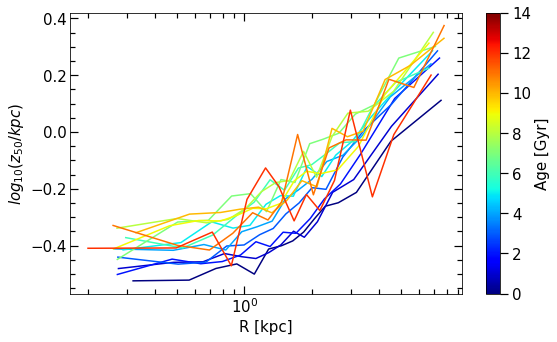

subhalo_127000000000031


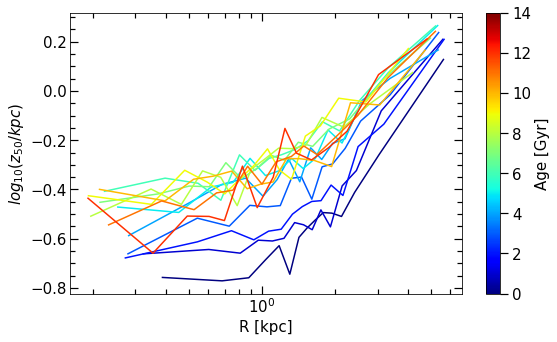

subhalo_127000000000030


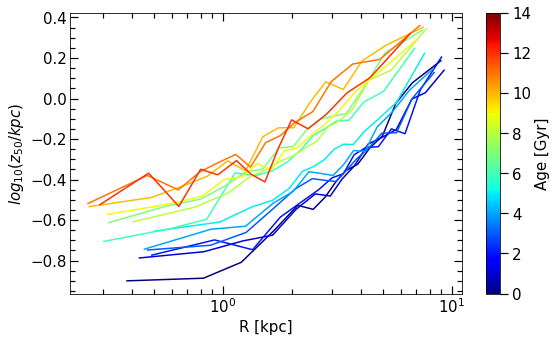

In [2]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import matplotlib as mpl
import z50

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in range(15):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')
    print('subhalo_'+str('%d'%ID[j]))

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < rgal )
    
    age_ = age[limit]

#     edades, = np.where((age_>4) & (age_<10))
    x_str = xn[limit]
    y_str = yn[limit]
    z_str = zn[limit]
    m_str = mstr[limit]
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)
    

    nb = 14
    
    delta = (14.-0.)/nb
    rango = np.arange(0,14,delta)
    
    
    color_range = np.linspace(0,14,nb)
    norm = mpl.colors.Normalize(vmin = color_range.min(),vmax= color_range.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'jet')
    
    for i in rango: 
        agelim, = np.where((age_>i) & (age_<i+delta))
        
        R = np.sqrt(x_str[agelim]**2 + y_str[agelim]**2)
        m = mstr[agelim]
        z = z_str[agelim]

        nbin = 15
        med, z_50 = z50.HMSH(R,z,m,nbin)
        
        ax.plot(med,np.log10(z_50), ls='-', color = cmap.to_rgba(i))
    
    cbar = fig.colorbar(cmap,ticks=[0,2,4,6,8,10,12,14]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    ax.set_xscale('log')
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    # ax.set_xlim(0,14)
    ax.set_ylabel('$log_{10}(z_{50}/kpc)$',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
#     ax.legend(fontsize=15,frameon=False)
    plt.show()
    fig.savefig('../_imagenes/z50_perfil/all_ages/z50_subh_'+str('%d'%ID[j])+'.png',dpi=100, xxbox_inches='tight')

### Hacemos los perfiles para el gas

127000000000002.0


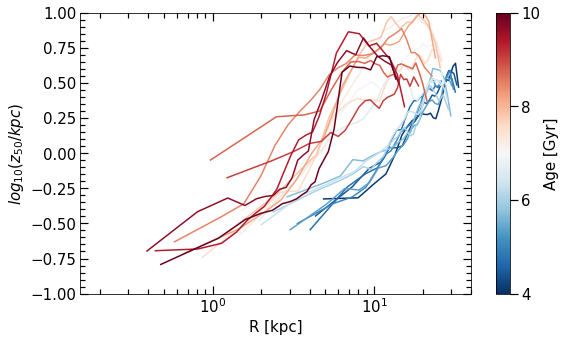

127000000000003.0


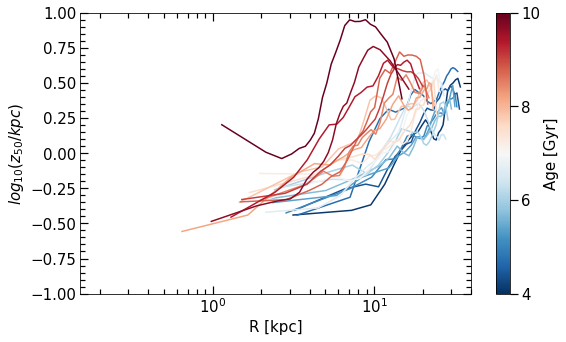

127000000000004.0


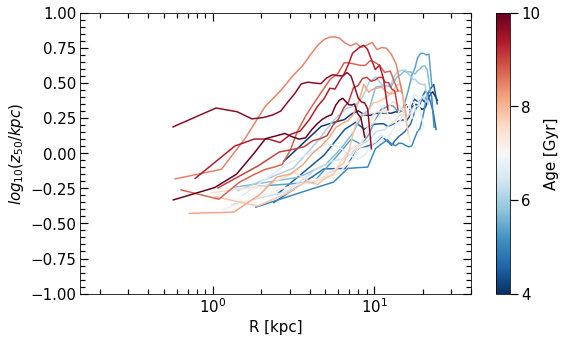

127000000000006.0


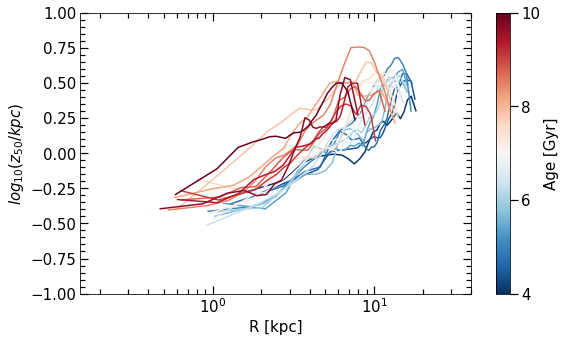

127000000000007.0


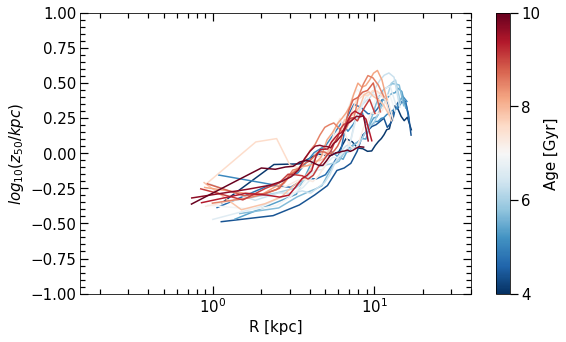

127000000000009.0


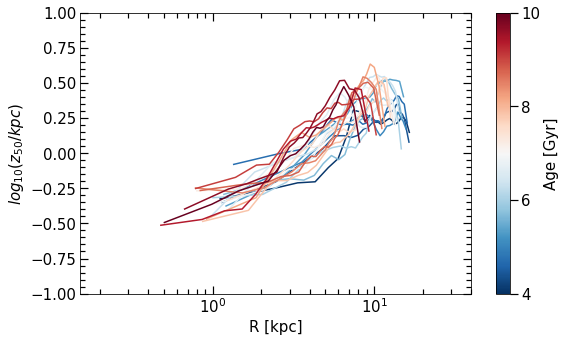

127000000000012.0


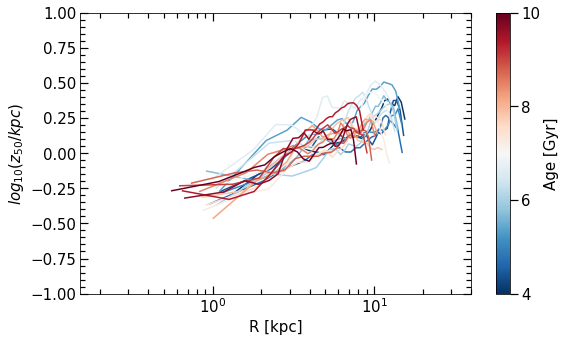

127000000000011.0


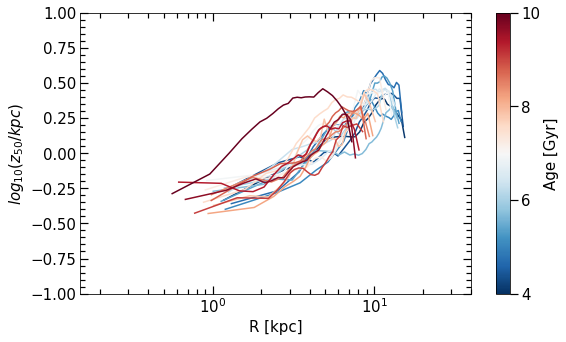

127000000000014.0


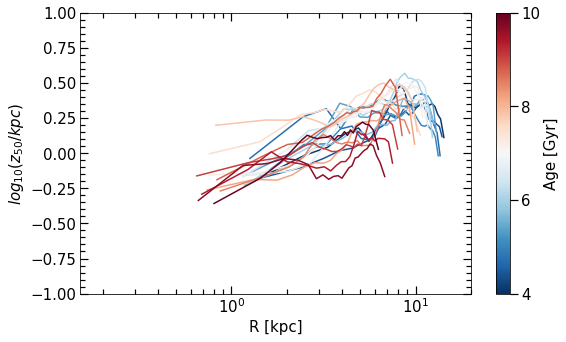

127000000000020.0


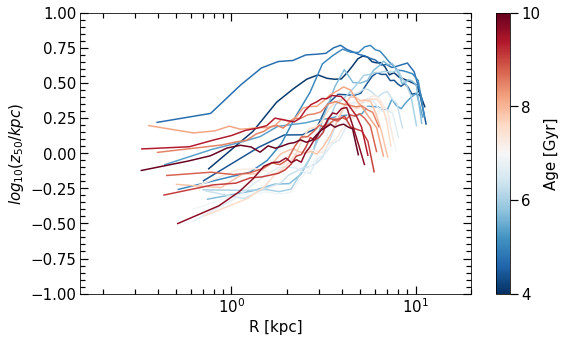

127000000000021.0


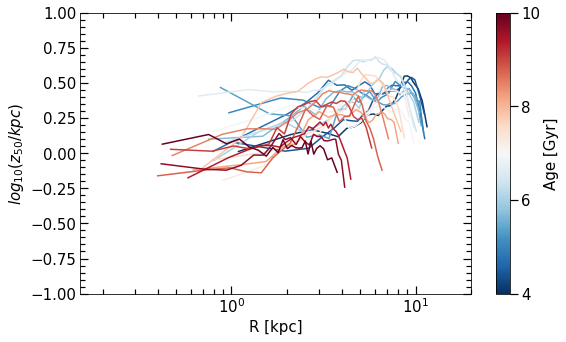

127000000000023.0


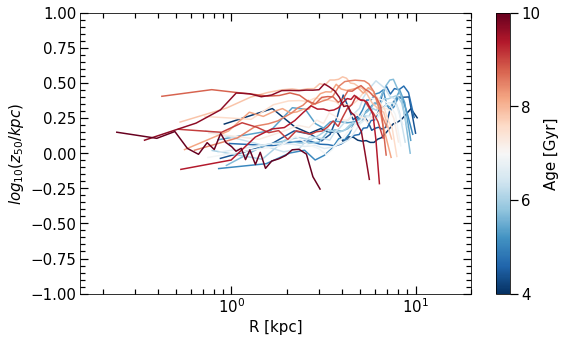

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

shID = np.loadtxt('../_data/my_halos.dat')[:,0]
data = np.loadtxt('../_data/time.dat')
s = data[:,0]
T = data[:,3]

ages = T.max() - T
mask,  = np.where((ages >= 4) & (ages <=10))

for j in range(12):
    
    z50p = np.loadtxt('../_data/gas_z50/gas_z50_prof_sh_'+str('%d'%shID[j])+'.dat')
    med = z50p[:,0]
    z50 = z50p[:,1]
    snap = z50p[:,2]
    
    print(shID[j])
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

    rango = np.arange(0,len(s[mask]),2)

    #Esto es para la barra de colores
    color_range = np.linspace(4,10,len(rango))
    norm = mpl.colors.Normalize(vmin = color_range.min(),vmax= color_range.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'RdBu_r')

    for i in rango:
        select, = np.where(snap == s[mask][i])
        ax.plot(med[select],np.log10(z50[select]), ls='-',color = cmap.to_rgba(ages[mask][i]))

    cbar = fig.colorbar(cmap,ticks=[4,6,8,10]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    if j > 7:
        ax.set_xlim(0.15,20)
    else:
        ax.set_xlim(0.15,40)

    ax.set_xscale('log')
    ax.set_ylim(-1,1)
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    # ax.set_xlim(0,14)
    ax.set_ylabel('$log_{10}(z_{50}/kpc)$',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
    #     ax.legend(fontsize=15,frameon=False)

    plt.show()

    fig.savefig('../_imagenes/z50_perfil_gas/z50_gas_sh_'+str('%d'%shID[j])+'.png',dpi=100, xxbox_inches='tight')

### Grafico los perfiles para el gas con bines en log y los puntos en rango de metalicidad


127000000000002.0


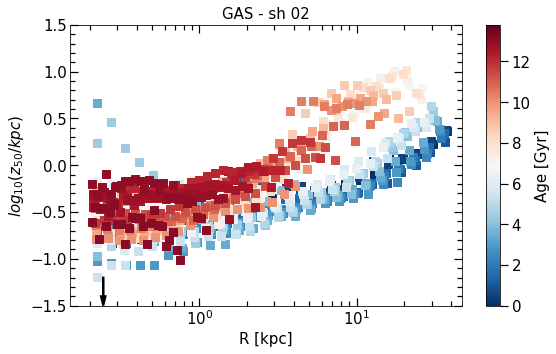

127000000000003.0


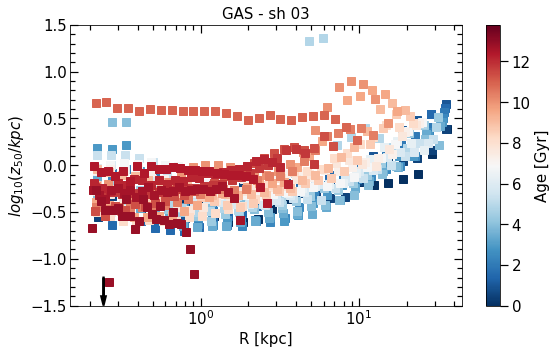

127000000000004.0


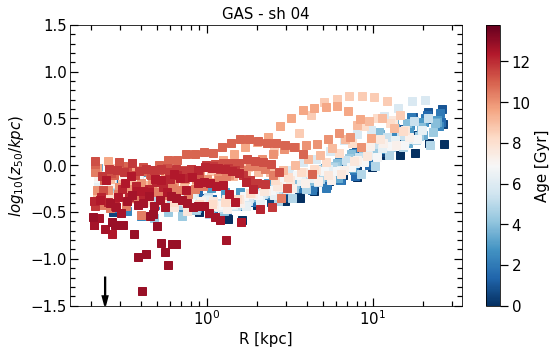

127000000000006.0


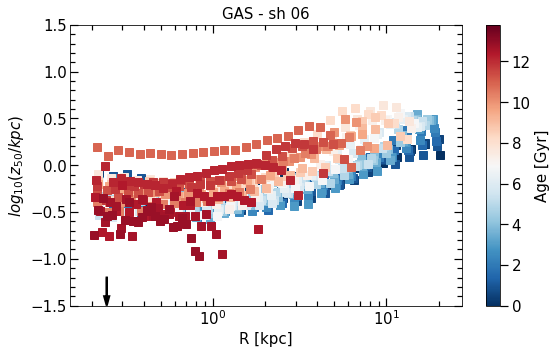

127000000000007.0


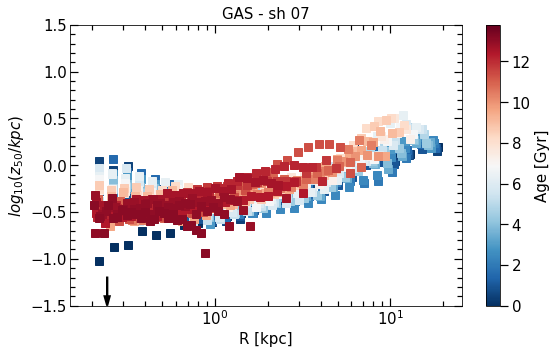

127000000000009.0


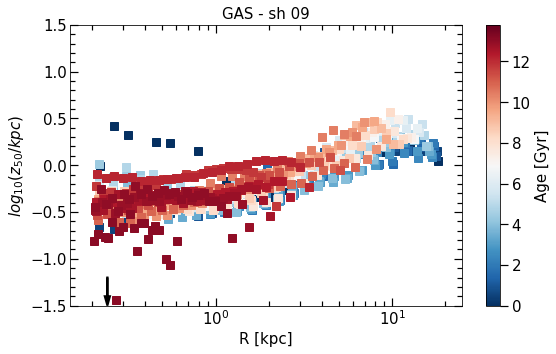

127000000000012.0


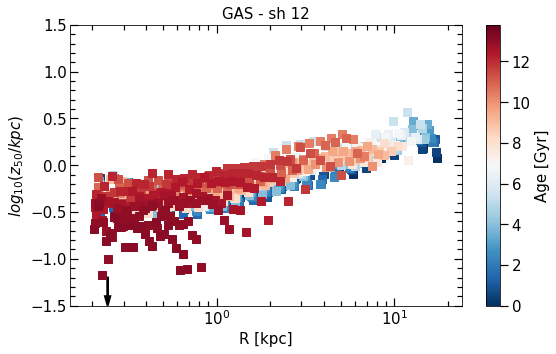

127000000000011.0


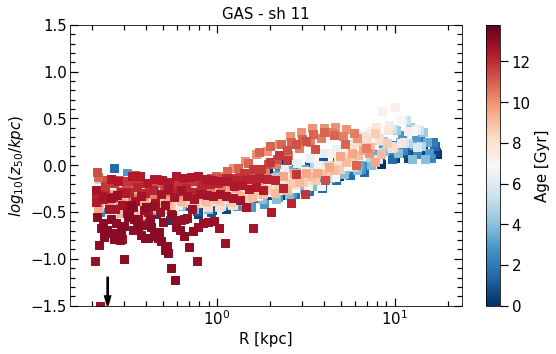

127000000000014.0


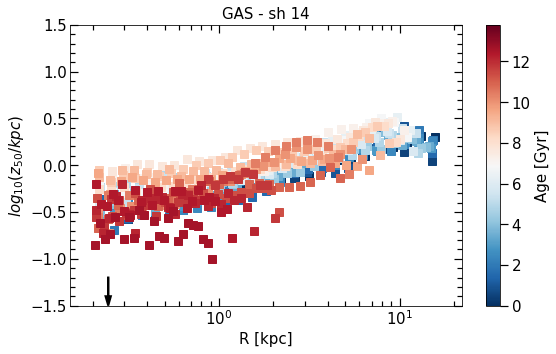

127000000000020.0


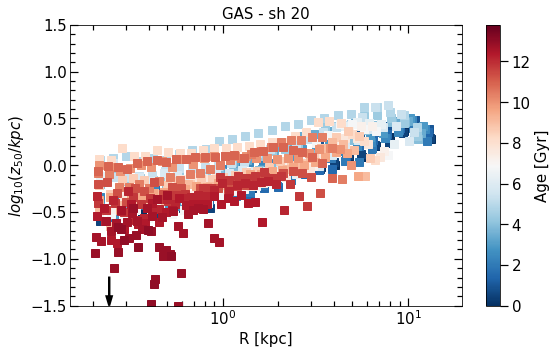

127000000000021.0


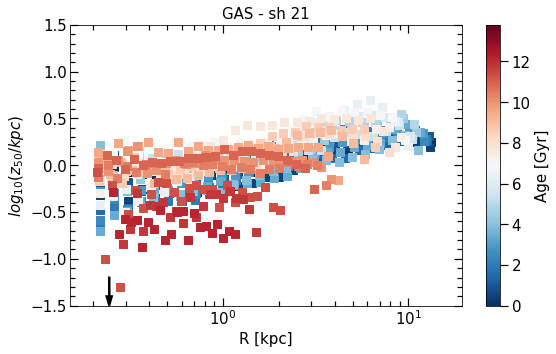

127000000000023.0


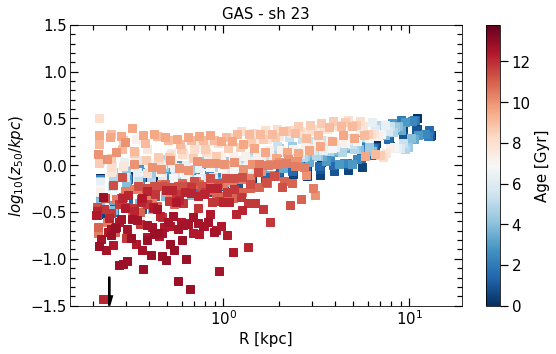

127000000000028.0


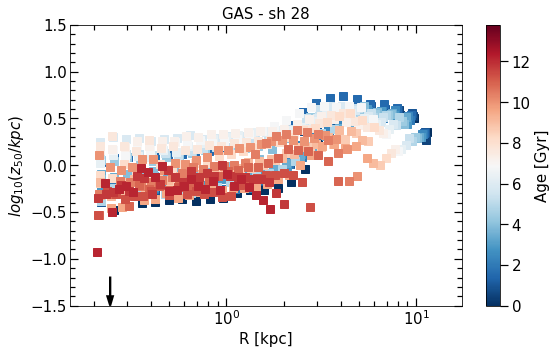

127000000000031.0


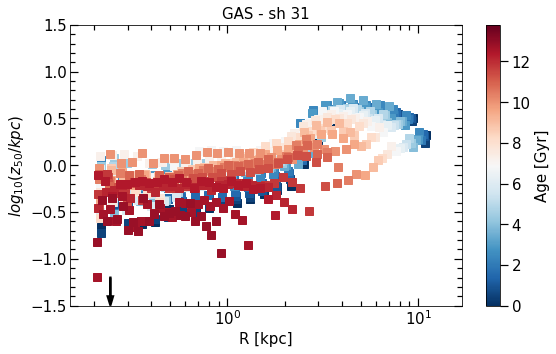

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

shID = np.loadtxt('../_data/my_halos.dat')[:,0]
Rvir = np.loadtxt('../_data/my_halos.dat')[:,2]
rgal=0.15*Rvir
data = np.loadtxt('../_data/time.dat')
s = data[:,0]
T = data[:,3]

ages = T.max() - T
# mask,  = np.where((ages >= 4) & (ages <=10))

for j in range(14):
    
    z50p = np.loadtxt('../_data/gas_z50/gas_z50_log_prof_sh_'+str('%d'%shID[j])+'.dat')
    med = z50p[:,0]
    z50 = z50p[:,1]
    snap = z50p[:,2]
    
    sin0, = np.where(z50 != 0)
    med  = med[sin0]
    z50  = z50[sin0]
    snap = snap[sin0]
    
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
    
    print(shID[j])
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

    rango = np.arange(0,len(s),3)

    #Esto es para la barra de colores
    color_range = np.linspace(0,13.8,len(rango))
    norm = mpl.colors.Normalize(vmin = color_range.min(),vmax= color_range.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'RdBu_r')

    for i in rango:
        select, = np.where(snap == s[i])
        ax.plot(med[select],np.log10(z50[select]), 's',ms=7.5,color = cmap.to_rgba(ages[i]))

    cbar = fig.colorbar(cmap,ticks=[0,2,4,6,8,10,12,14]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    ax.set_xscale('log')
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    ax.set_xlim(0.15,rgal[j]+5)
    ax.set_ylim(-1.5,1.5)
    ax.set_title('GAS - sh '+Id, fontsize=15)
    ax.set_ylabel('$log_{10}(z_{50}/kpc)$',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
    ax.arrow(0.244,-1.2,0,-0.3,
        length_includes_head=True, head_width=1./60, head_length=0.1,
        lw=2,color='k') 
    # ax.legend(fontsize=15,frameon=False)

    fig.savefig('../_imagenes/z50_perfil_gas/z50_log_prof_sh_'+str('%d'%shID[j])+'.png',dpi=100, xxbox_inches='tight')
    plt.show()

### El mismo plot de arriba pero agrego los puntos para rangos de metalicidades

127000000000002.0


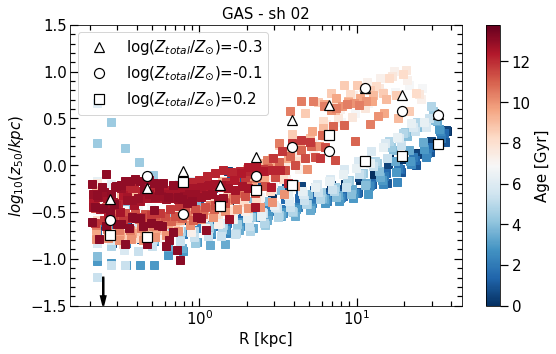

127000000000003.0


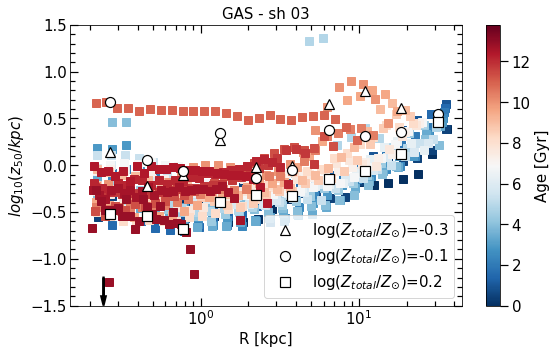

127000000000004.0


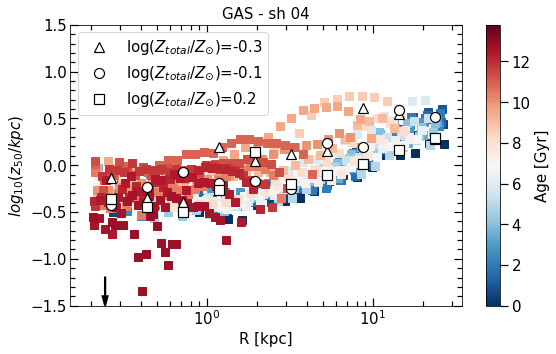

127000000000006.0


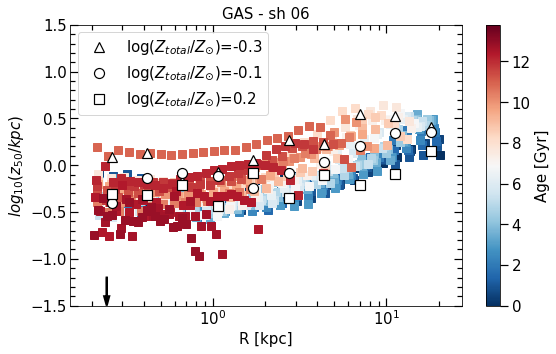

127000000000007.0


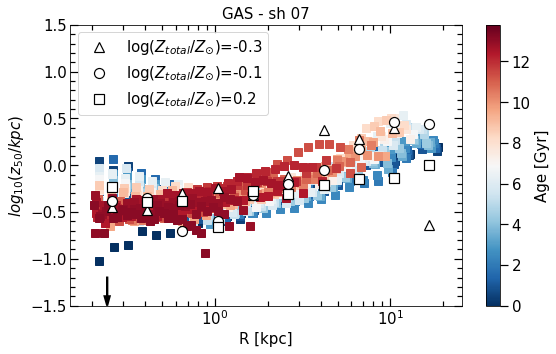

127000000000009.0


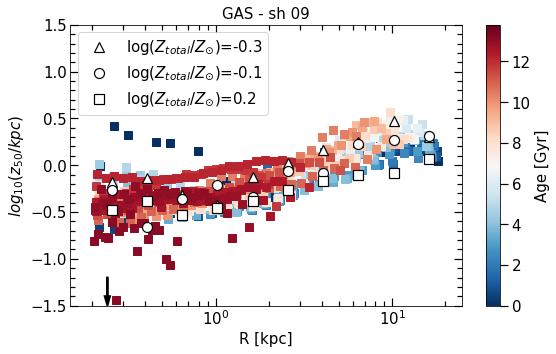

127000000000012.0


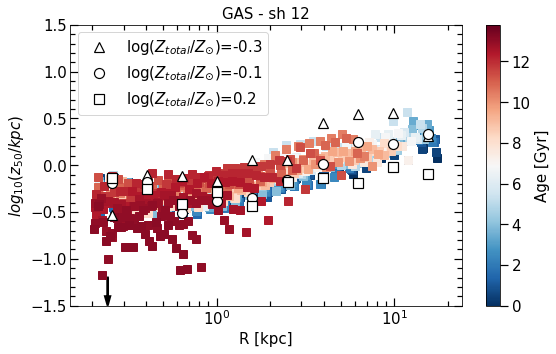

127000000000011.0


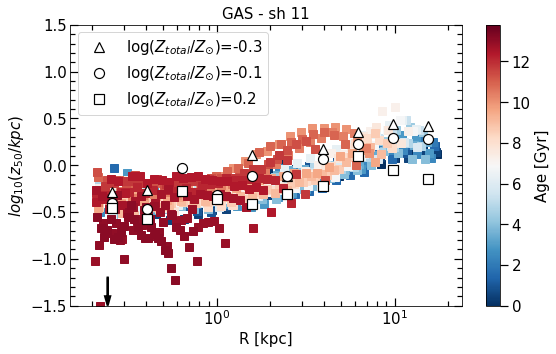

127000000000014.0


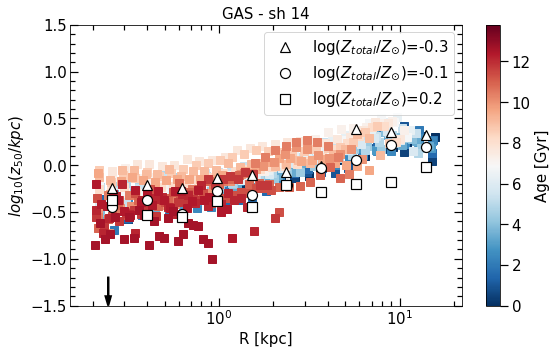

127000000000020.0


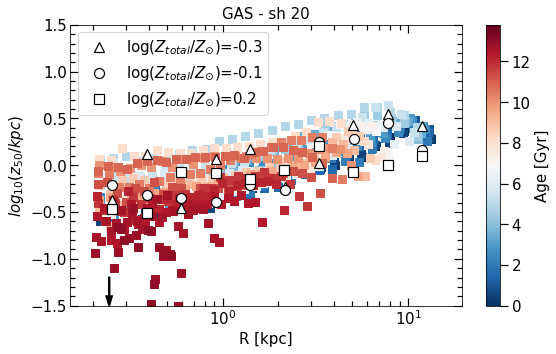

127000000000021.0


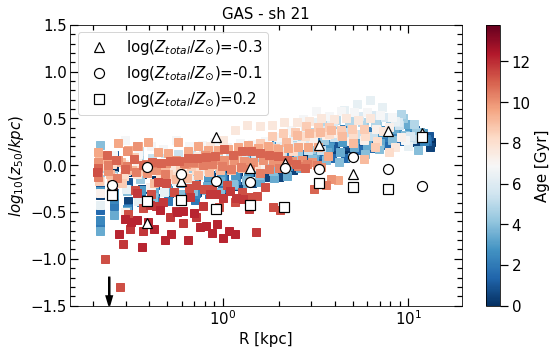

127000000000023.0


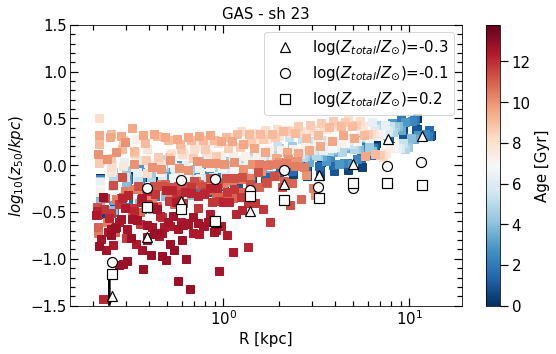

127000000000028.0


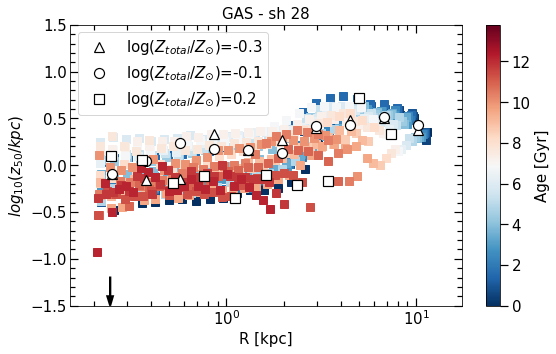

127000000000031.0


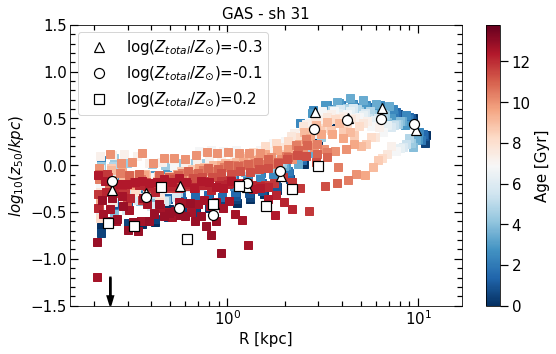

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

shID = np.loadtxt('../_data/my_halos.dat')[:,0]
Rvir = np.loadtxt('../_data/my_halos.dat')[:,2]
rgal=0.15*Rvir
data = np.loadtxt('../_data/time.dat')
s = data[:,0]
T = data[:,3]

ages = T.max() - T
# mask,  = np.where((ages >= 4) & (ages <=10))

valores = (-0.3,-0.1,0.2)
simbol = ('^','o','s')

for j in range(14):
    
    print(shID[j])
    
    Id = ''
    for aux in list(str('%d'%shID[j]))[-2:]:
        Id += aux
        
    z50p = np.loadtxt('../_data/gas_z50/gas_z50_log_prof_sh_'+str('%d'%shID[j])+'.dat')
    med = z50p[:,0]
    z50 = z50p[:,1]
    snap = z50p[:,2]
    
    # sin0, = np.where(z50 != 0)
    # med = med[sin0]
    # z50 = z50[sin0]
    # snap = snap[sin0]
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)
    
    for k in range(3):
        points = np.loadtxt('../_data/gas_Ztot_points/gas_Ztot_points_'+str('%s'%valores[k])+'_sh_'+str('%d'%shID[j])+'.dat')
        med_P = points[:,0]
        z50_P = points[:,1]
        
        ax.plot(med_P,np.log10(z50_P),simbol[k], ms=10, color='w',mec='k',mew=1.2,
                label=r'log($Z_{total}/Z_{\odot}$)='+str('%s'%valores[k]),zorder=100)
  
    rango = np.arange(0,len(s),3)

    #Esto es para la barra de colores
    color_range = np.linspace(0,13.8,len(rango))
    norm = mpl.colors.Normalize(vmin = color_range.min(),vmax= color_range.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'RdBu_r')

    for i in rango:
        select, = np.where(snap == s[i])
        ax.plot(med[select],np.log10(z50[select]), 's',ms=7.5,color = cmap.to_rgba(ages[i]))

    cbar = fig.colorbar(cmap,ticks=[0,2,4,6,8,10,12,14]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    ax.set_xscale('log')
    ax.set_ylim(-1.5,1.5)
    ax.set_xlim(0.15,rgal[j]+5)
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    ax.set_title('GAS - sh '+Id,fontsize=15)
    ax.set_ylabel('$log_{10}(z_{50}/kpc)$',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
    ax.legend(fontsize=15, fancybox=True)
    ax.arrow(0.244,-1.2,0,-0.3,
        length_includes_head=True, head_width=1./60, head_length=0.1,
        lw=2,color='k') 

    fig.savefig('../_imagenes/z50_perfil_gas/z50_log_prof_sh_'+str('%d'%shID[j])+'_points.png',dpi=100, xxbox_inches='tight')
    # fig.savefig('../_imagenes/z50_perfil_gas/z50_log_prof_sh_'+str('%d'%shID[j])+'_points3.png',dpi=100, xxbox_inches='tight')
    plt.show()


### Grafico los valores de z50 a met fija para el gas y las estrellas

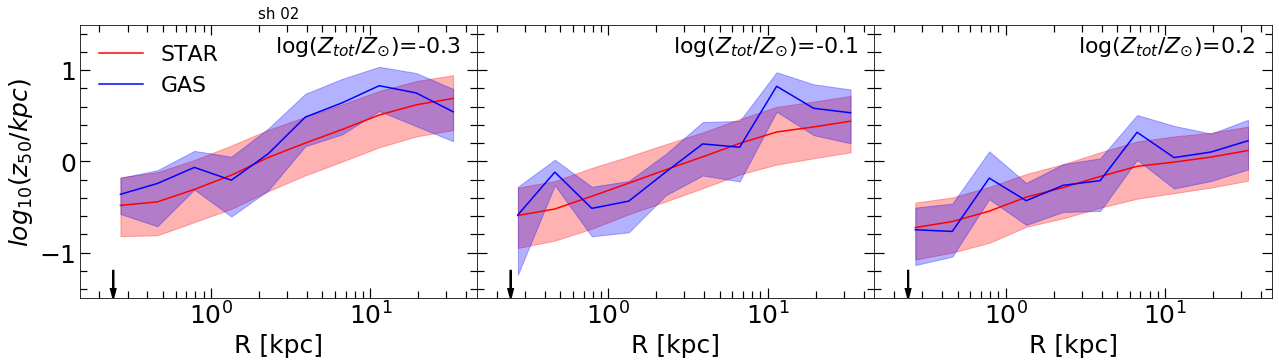

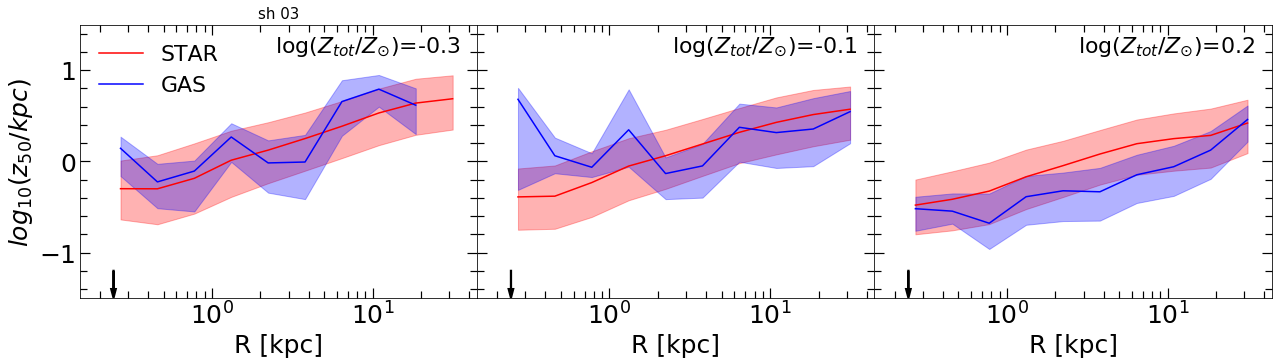

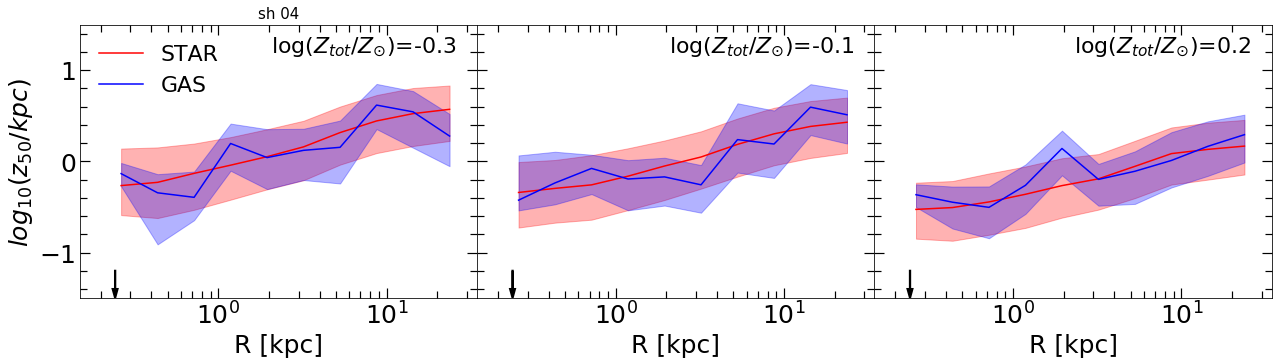

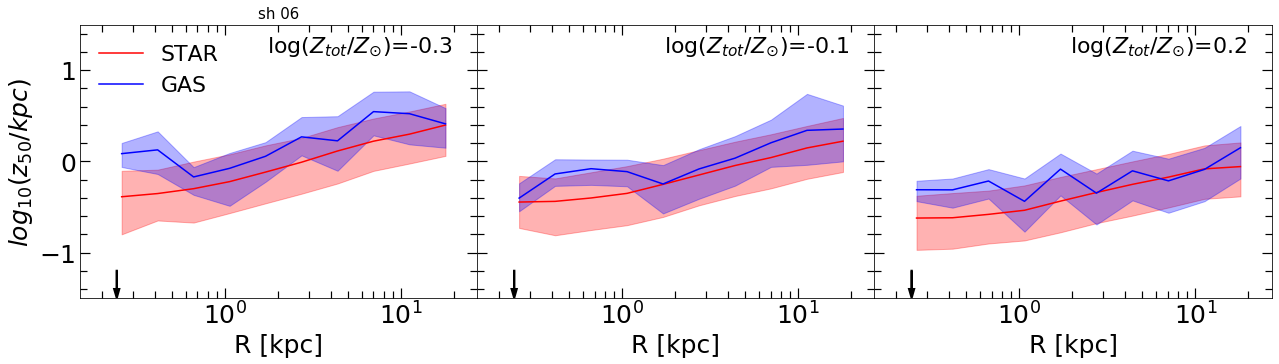

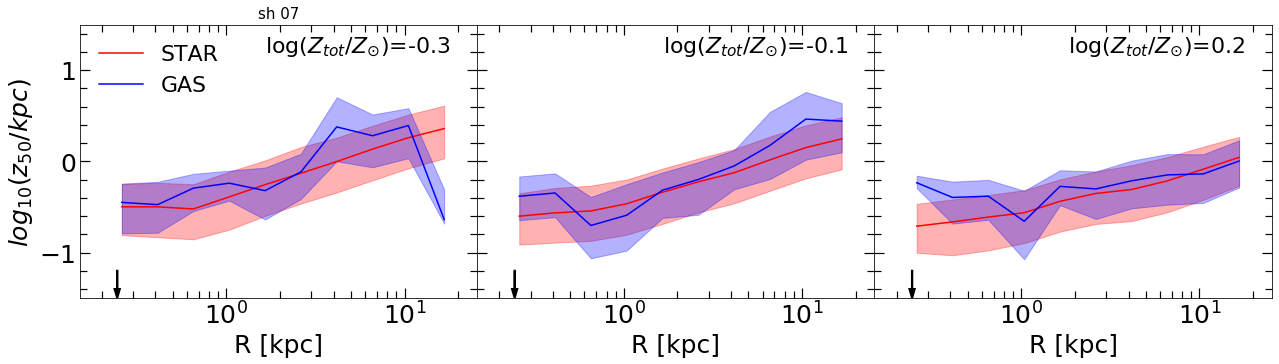

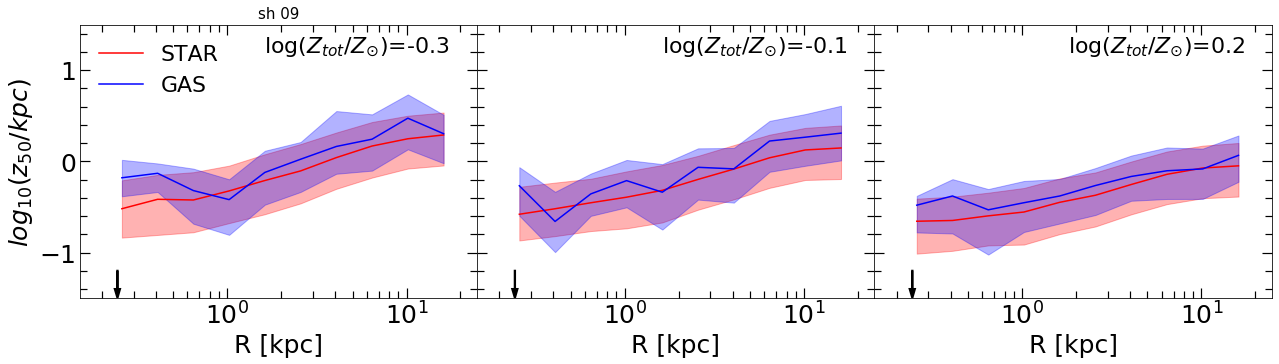

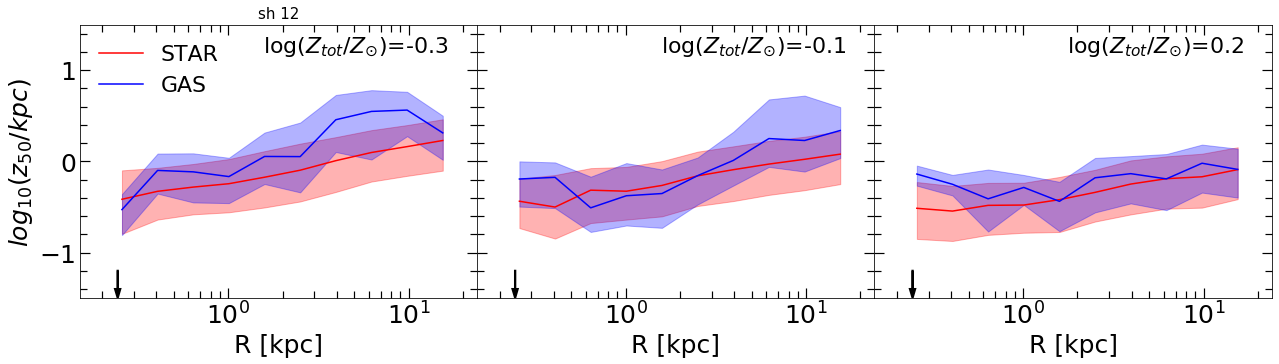

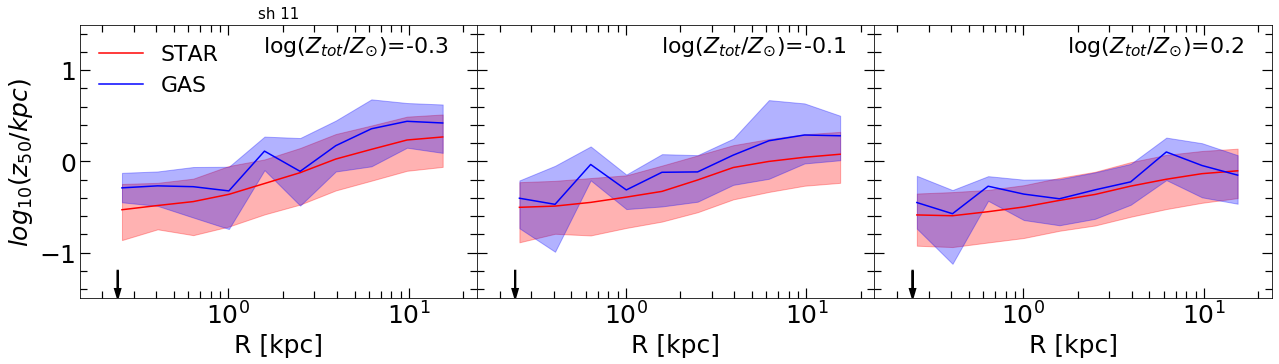

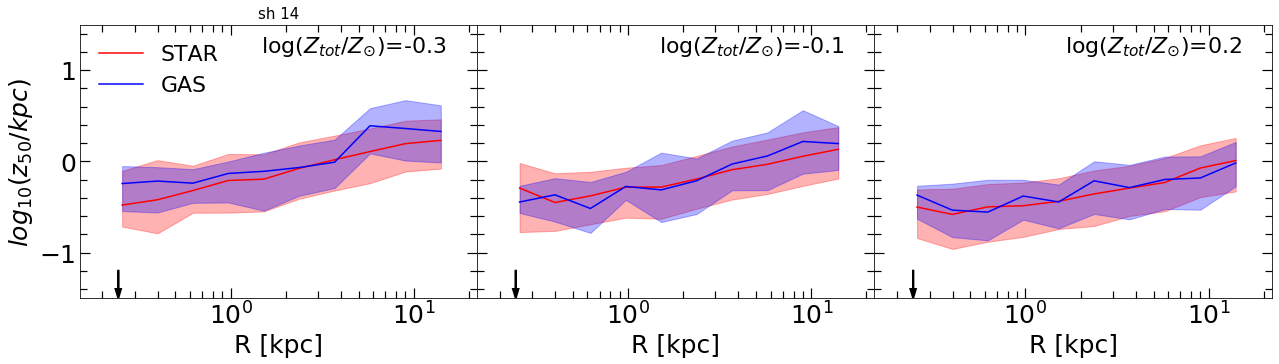

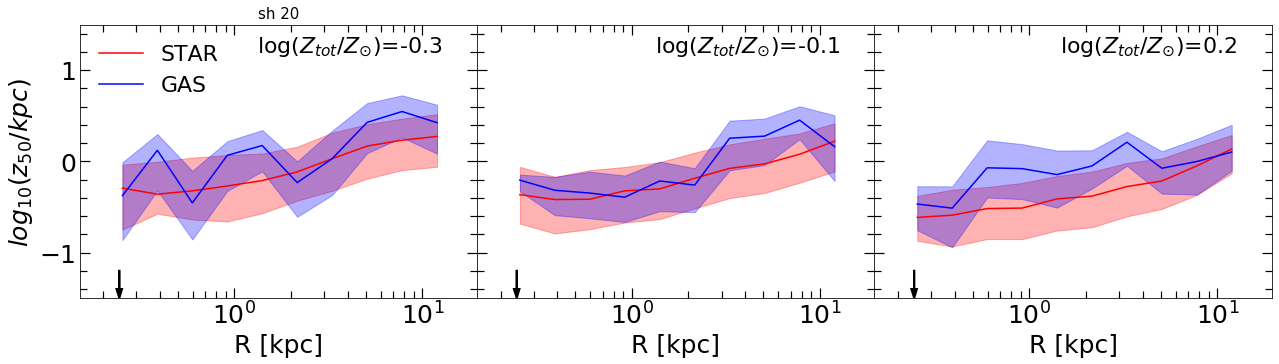

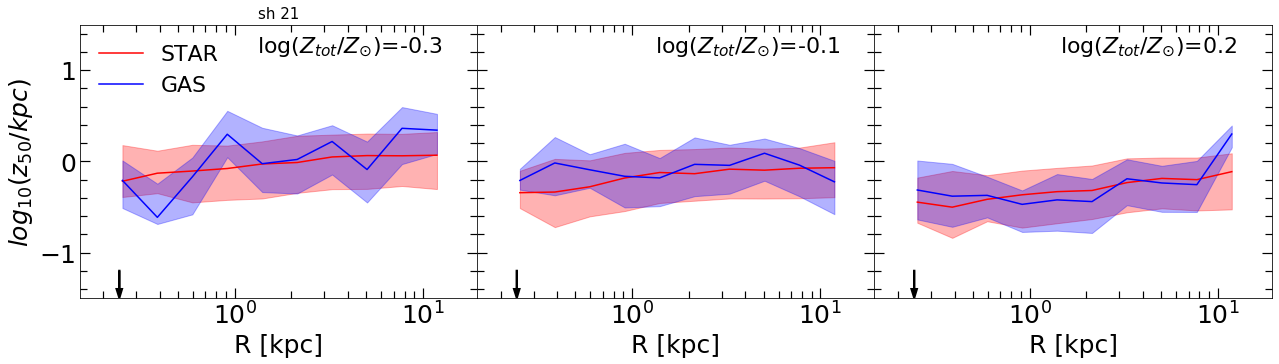

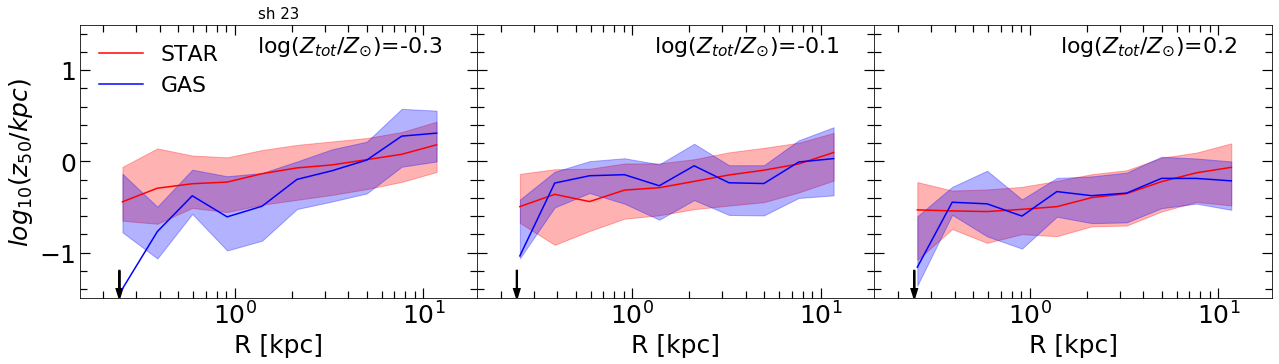

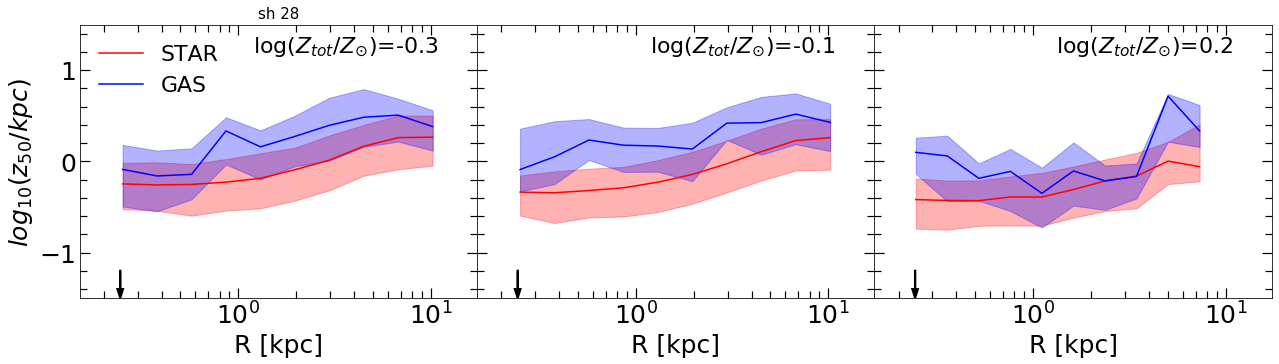

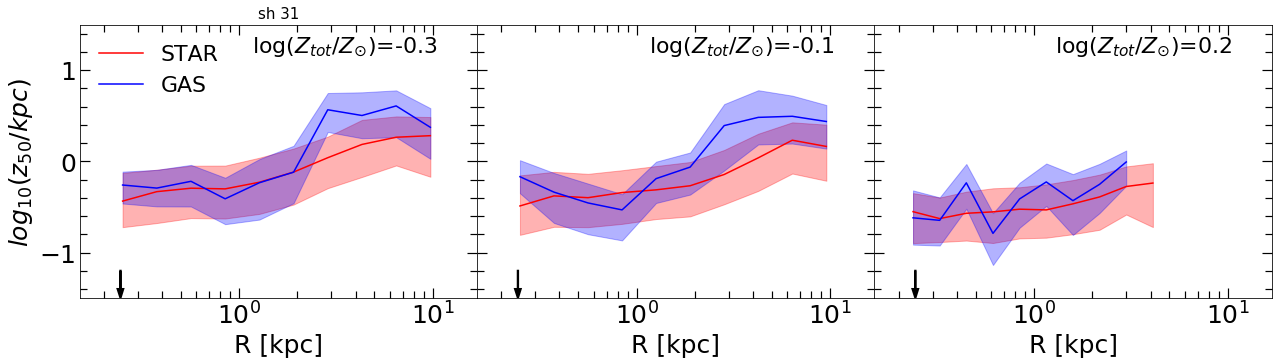

In [12]:
import matplotlib.pyplot as plt
import numpy as np

shID = np.loadtxt('../_data/my_halos.dat')[:,0]
R200 = np.loadtxt('../_data/my_halos.dat')[:,2]
rgal = 0.15*R200

valores =(-0.3,-0.1,0.2)

for j in range(14):
    
    Id = ''
    for aux in list(str('%d'%shID[j]))[-2:]:
        Id += aux
        
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
    fig.subplots_adjust(bottom=0.17, left =0.06, right = 0.98, top = 0.93, wspace=0., hspace= 0)
    
    for k in range(3):
    ## STARS
        data_str = np.loadtxt('../_data/charac_age/charac_age_'+str('%s'%valores[k])+'_sh_'+str('%d'%shID[j])+'.dat')
        med_str = data_str[:-1,0]
        z50_str = data_str[:-1,1]
        p25_str = data_str[:-1,4]
        p75_str = data_str[:-1,5]

    ## GAS
        points = np.loadtxt('../_data/gas_Ztot_points/gas_Ztot_points_'+str('%s'%valores[k])+'_sh_'+str('%d'%shID[j])+'.dat')
        med_gas = points[:,0]
        z50_gas = points[:,1]
        p25_gas = points[:,2]
        p75_gas = points[:,3]

        ax[k].plot(med_str,np.log10(z50_str),'-', color='r', label=r'STAR')
        ax[k].fill_between(med_str,np.log10(p25_str),np.log10(p75_str),color='r',alpha=0.3)
        ax[k].plot(med_gas,np.log10(z50_gas),'-', color='b', label=r'GAS')
        ax[k].fill_between(med_gas,np.log10(p25_gas),np.log10(p75_gas),color='b',alpha=0.3)
        ax[k].set_ylim(-1.5,1.5)
        ax[k].set_xlim(0.15,rgal[j]+5)
        ax[k].text(rgal[j]-(rgal[j]/8.5),1.2,r'log($Z_{tot}/Z_{\odot}$)='+str('%s'%valores[k]), fontsize=22,ha='right')

        ax[k].set_xscale('log')
        ax[k].minorticks_on()
        ax[k].tick_params( labelsize=25)
        ax[k].tick_params('both', length=7, width=1.2,which='minor', direction='in', right='on',top='on')
        ax[k].tick_params('both', length=10, width=1.2,which='major', direction='in', right='on',top='on')
        ax[k].set_xlabel('R [kpc]',fontsize=25)
        ax[k].arrow(0.244,-1.2,0,-0.3,
            length_includes_head=True, head_width=1./60, head_length=0.1,
            lw=2,color='k') 
        
        if k != 0:
            ax[k].set_yticklabels([])
        else:
            ax[k].set_ylabel('$log_{10}(z_{50}/kpc)$',fontsize=25)
            ax[k].set_title('sh '+Id,fontsize=15)
            ax[k].legend(fontsize=22,frameon=False,loc=2)
            
    fig.savefig('../_imagenes/z50_logbin/z50_logbin_sh_'+str('%d'%shID[j])+'.png',dpi=100, xxbox_inches='tight')

    plt.show()

### Calculo el z50 vs la metalicidad para radios fijos

In [6]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import matplotlib as mpl
import metallicity_profile as metp
import z50 as scale_high

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/store/erebos/omarioni/_simulations/snap_127/'


for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')

    print('subhalo_'+str('%d'%ID[j]))

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    sft  = snap['/Str/FormationTime'][()]
    met  = snap['/Str/Metallicity'][()]
    tmet = snap['/Str/Total_Metallicity'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
    
    Ztot = tmet[amask]/0.0127

    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h

    rgal = 0.15*Rvir*aexp/h

    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    rn = np.sqrt(xn**2 + yn**2 + zn**2 )

    limit2, = np.where(rn < rgal)
    w0, = np.where(Ztot[limit2]>0)
    
    edad = age[limit2][w0]

    #     edades, = np.where((age_>4) & (age_<10))
    x_str = xn[limit2][w0]
    y_str = yn[limit2][w0]
    z_str = zn[limit2][w0]
    Z_tot  = Ztot[limit2][w0]
    m_str = mstr[limit2][w0]
    R = np.sqrt(x_str**2 + y_str**2)
        
    
    for valor in (2,4,6,8):
    
        radio = np.where((R > valor - 0.5) & (R < valor + 0.5))

        met, z50, charac_age, nodos, p25, p75 = scale_high.HMSH_log_a(
            Z_tot[radio],
            z_str[radio],
            m_str[radio], 
            edad[radio],
            10,
            -1.2,
        )

        data = np.ndarray([11,6])
        data[:,0] = np.append(met,np.nan)
        data[:,1] = np.append(z50,np.nan)
        data[:,2] = np.append(charac_age,np.nan)
        data[:,3] = nodos
        data[:,4] = np.append(p25,np.nan)
        data[:,5] = np.append(p75,np.nan)

        np.savetxt(
            '../_data/z50_vs_met/z50_met_rad'+str('%s'%valor)+'_sh_'+str('%d'%ID[j])+'.dat',
            data,
            fmt = ('%12.8f','%12.8f','%12.8f','%12.8f','%12.8f','%12.8f'),
        )


subhalo_127000000000002
subhalo_127000000000003
subhalo_127000000000004
subhalo_127000000000006
subhalo_127000000000007
subhalo_127000000000009
subhalo_127000000000012
subhalo_127000000000011
subhalo_127000000000014
subhalo_127000000000020
subhalo_127000000000021
subhalo_127000000000023
subhalo_127000000000028
subhalo_127000000000031


### z50 vs metalicidad en radios fijos para el gas

In [7]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import metallicity_profile as metp
import z50
import density

shID = np.loadtxt('../_data/my_halos.dat')[:,0]
tiempos = np.loadtxt('../_data/time.dat')
s = tiempos[:,0]
T = tiempos[:,3]
edad = T.max() - T

p = (2,4,6,8)

path = '/store/erebos/omarioni/_simulations/snap_'

for j in range(14):
    
    print('sh '+str('%d'%shID[j])) 
    
    for valor in p:
              
        data = np.loadtxt('../_data/z50_vs_met/z50_met_rad'+str('%s'%valor)+'_sh_'+str('%d'%ID[j])+'.dat')
        met = data[:-1,0]
        charac_age = data[:-1,2]
        nodos = data[:,3]
        
        z50 = np.ones(len(charac_age))*np.nan
        p25 = np.ones(len(charac_age))*np.nan
        p75 = np.ones(len(charac_age))*np.nan
        
        snapshot = []
        
        for i in range(len(charac_age)):
            
            min_dif = np.argmin(np.abs(charac_age[i]-edad))
            snapshot.append(s[min_dif])
            
            snap = h5py.File(path + str('%03d'%s[min_dif])+ '/subhalo_'+str('%d'%shID[j])+'.h5py', 'r')

            # print(s[min_dif])

            aexp = snap['/Time'][()]
            h    = snap['/h'][()]
            Om_L = snap['/Omega_Lambda'][()]
            Om_M = snap['/Omega_0'][()]
            Rvir = snap['/R200'][()]

            pstr = snap['/Str/Coordinates'][()]
            mstr = snap['/Str/Masses'][()]
            vstr = snap['/Str/Velocities'][()]
            sft  = snap['/Str/FormationTime'][()]

            pgas = snap['/Gas/Coordinates'][()]
            mgas = snap['/Gas/Masses'][()]
            Zgas = snap['/Gas/Total_Metallicity'][()]


            amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.

            if len(amask)==0:
                continue

            ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
            age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

            Z_tot = Zgas/0.0127

            xstr = pstr[amask,0]*aexp/h
            ystr = pstr[amask,1]*aexp/h
            zstr = pstr[amask,2]*aexp/h
            rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

            xgas = pgas[:,0]*aexp/h
            ygas = pgas[:,1]*aexp/h
            zgas = pgas[:,2]*aexp/h

            v_x = vstr[amask,0] *np.sqrt(aexp)
            v_y = vstr[amask,1] *np.sqrt(aexp)
            v_z = vstr[amask,2] *np.sqrt(aexp)

            #----------------------masas----------------------------
            mstr = mstr[amask]*1e10/h
            mgas = mgas*1e10/h

            rgal = 0.15*Rvir*aexp/h
            limit, = np.where(rstr < rgal)


            rsort = np.argsort(rstr[limit])
            Mc = np.cumsum(mstr[limit][rsort])
            Mgal = Mc[-1]
            limit50, = np.where(Mc < Mgal/2)


            r50 = rstr[limit][rsort][limit50][-1]

            veloc, = np.where(rstr < r50/2.)

            #----------componentes de la velocidad del centro de masa------------
            vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
            vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
            vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

            vx = v_x - vxcm
            vy = v_y - vycm
            vz = v_z - vzcm

            e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

            xn_gas = e1x*xgas + e1y*ygas + e1z*zgas
            yn_gas = e2x*xgas + e2y*ygas + e2z*zgas
            zn_gas = e3x*xgas + e3y*ygas + e3z*zgas
            rn_gas = np.sqrt(xn_gas**2+yn_gas**2+zn_gas**2)


            limit2, = np.where(rn_gas < rgal)
            w0, = np.where(Z_tot[limit2]>0)

            R = np.sqrt(xn_gas[limit2][w0]**2 + yn_gas[limit2][w0]**2)
            z = zn_gas[limit2][w0]
            m = mgas[limit2][w0]
            Ztot = Z_tot[limit2][w0]


            rango = np.where((R > valor - 0.5) & (R < valor + 0.5))

            mask, = np.where((Ztot[rango] < nodos[i+1]) & (Ztot[rango] > nodos[i]))

            if (len(mask)==0 or len(mask)==1):
                continue
            
            zabs =np.abs(z)
            zorder = np.argsort(zabs[rango][mask])

            zsort = zabs[rango][mask][zorder]
            msort = m[rango][mask][zorder]

            mtot   = np.cumsum(msort)
            m_mean, = np.where(mtot < mtot[-1]/2.)
            
            if (len(m_mean)==0 or len(m_mean)==1):
                continue

            z50[i] = zsort[m_mean][-1]
            
            p25[i], p75[i] = np.percentile(zsort,[25,75])
            
         
        mett = np.ndarray([len(charac_age), 5])
        mett[:,0] = met
        mett[:,1] = z50
        mett[:,2] = p25
        mett[:,3] = p75
        mett[:,4] = snapshot

        np.savetxt(
            '../_data/gas_z50_vs_met/gas_z50met_rad'+str('%s'%valor)+'_sh_'+str('%d'%shID[j])+'.dat', 
            mett, 
            fmt=('%12.8f','%12.8f','%12.8f','%12.8f', '%d'),
        )

sh 127000000000002
sh 127000000000003
sh 127000000000004
sh 127000000000006
sh 127000000000007
sh 127000000000009
sh 127000000000012
sh 127000000000011
sh 127000000000014
sh 127000000000020
sh 127000000000021
sh 127000000000023
sh 127000000000028
sh 127000000000031


### Grafico z50 vs met para radios fijos GAS+STR

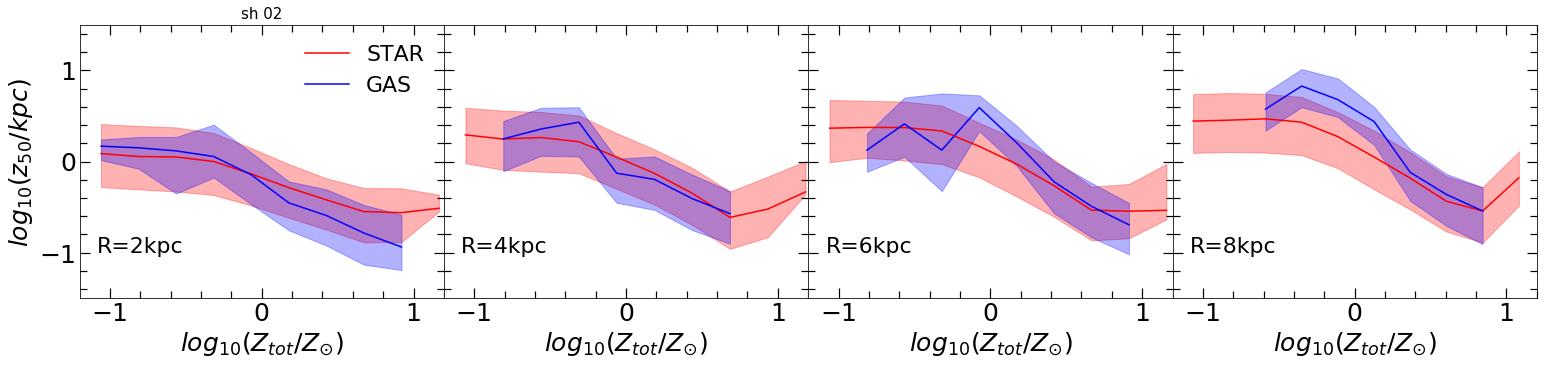

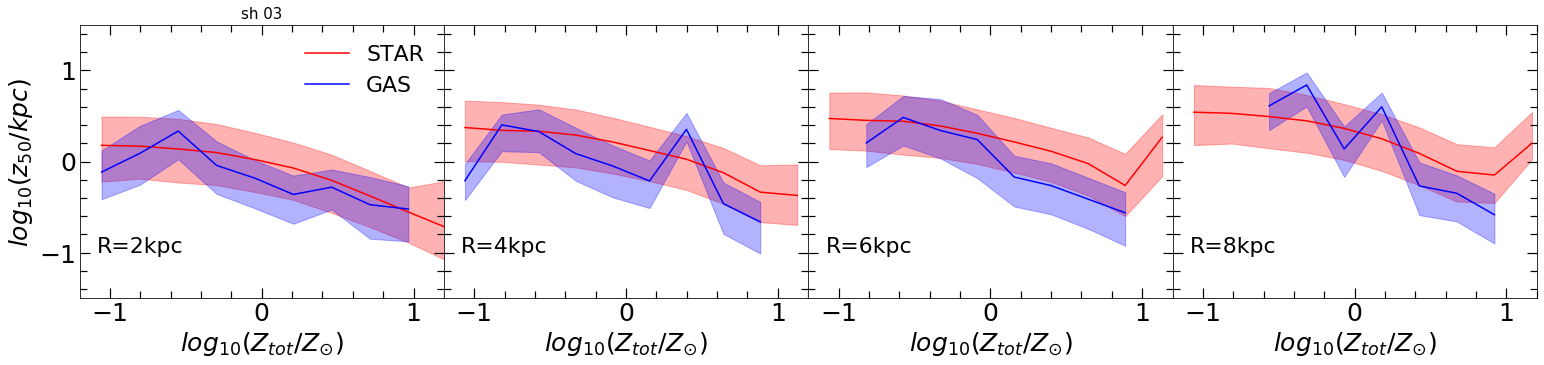

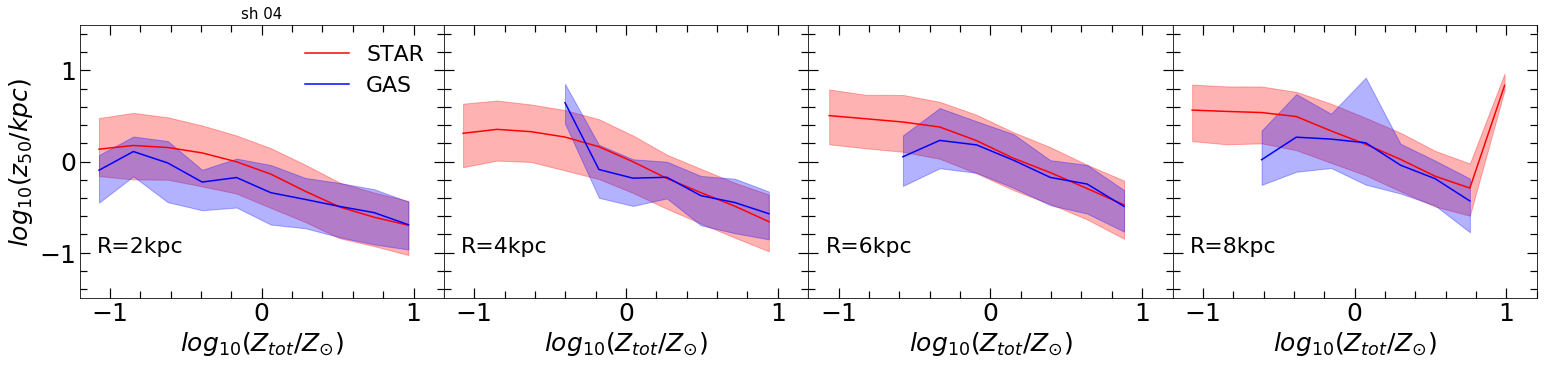

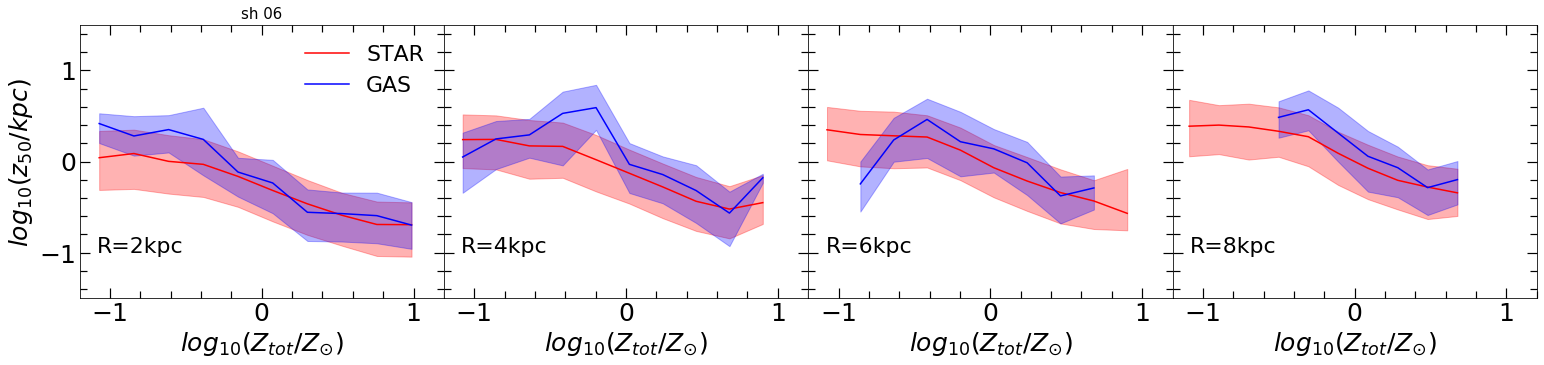

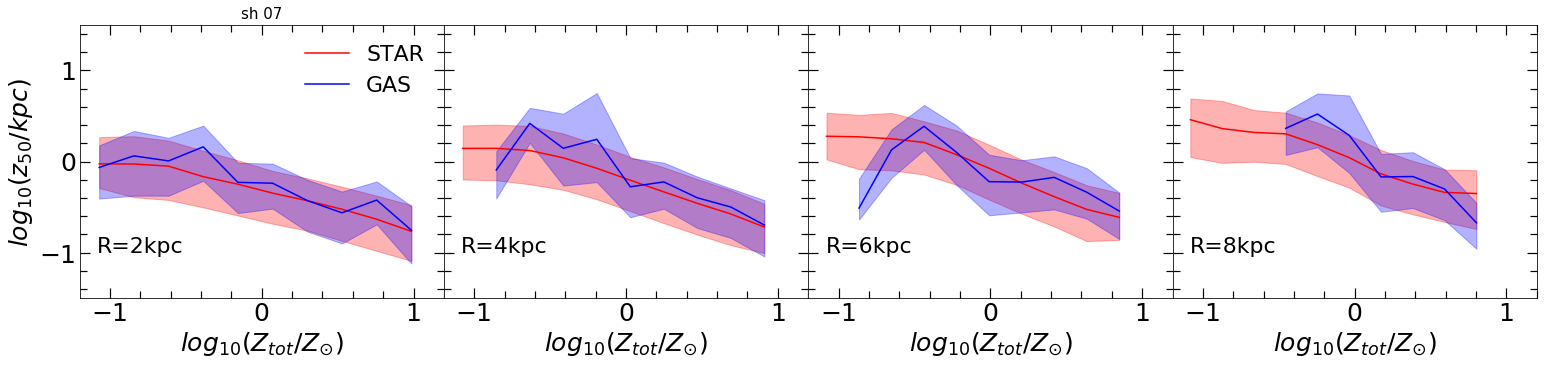

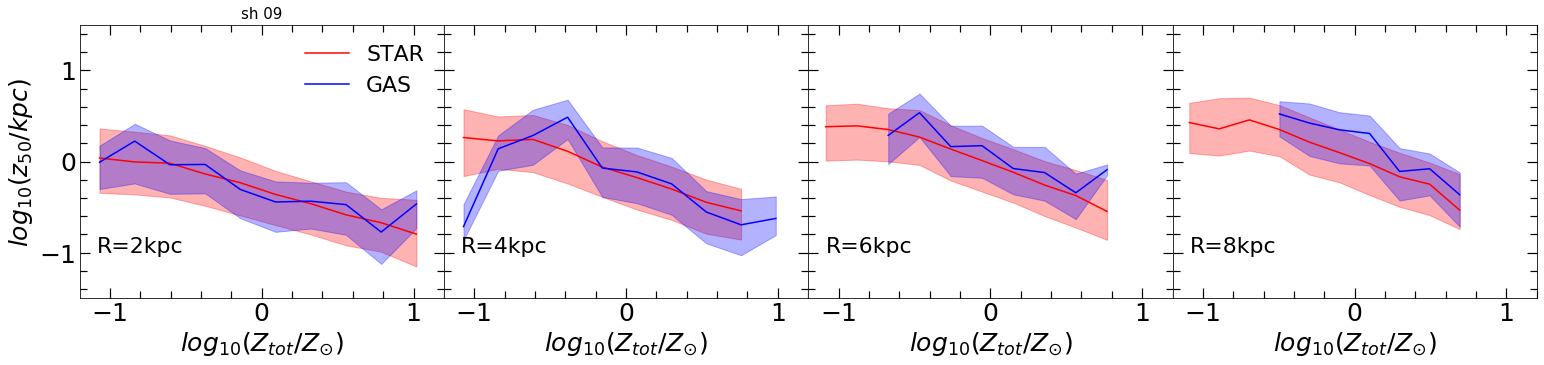

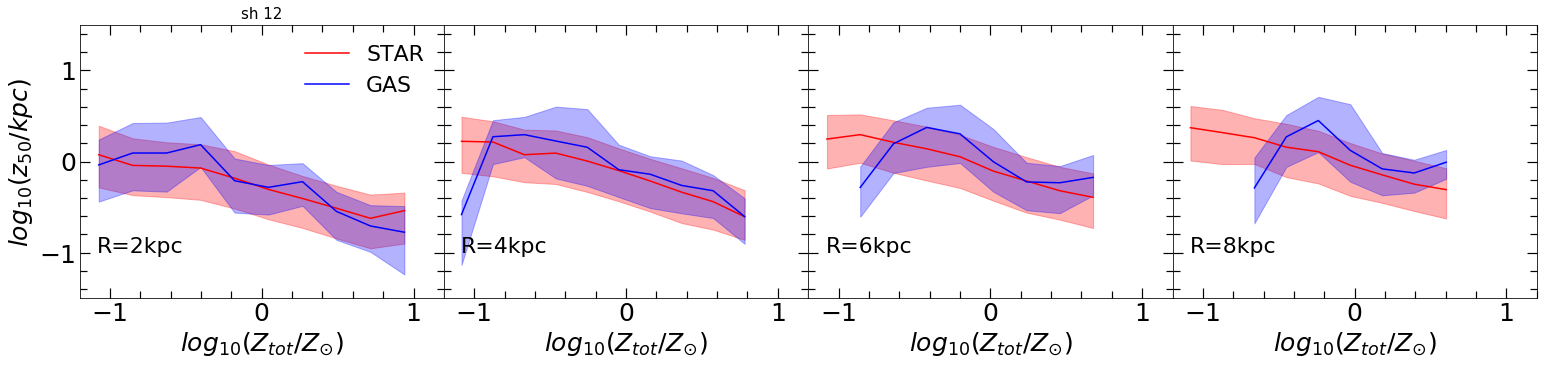

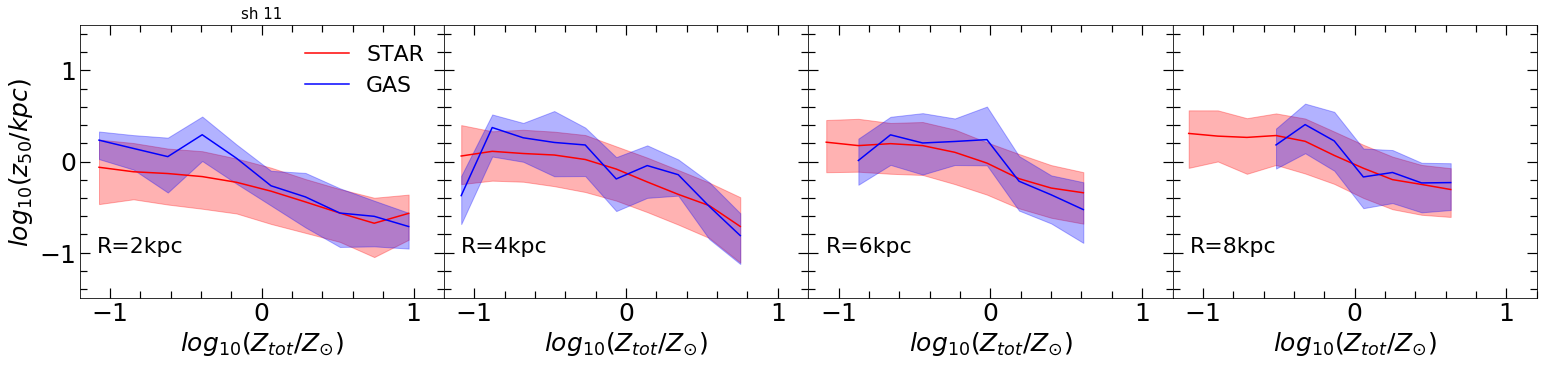

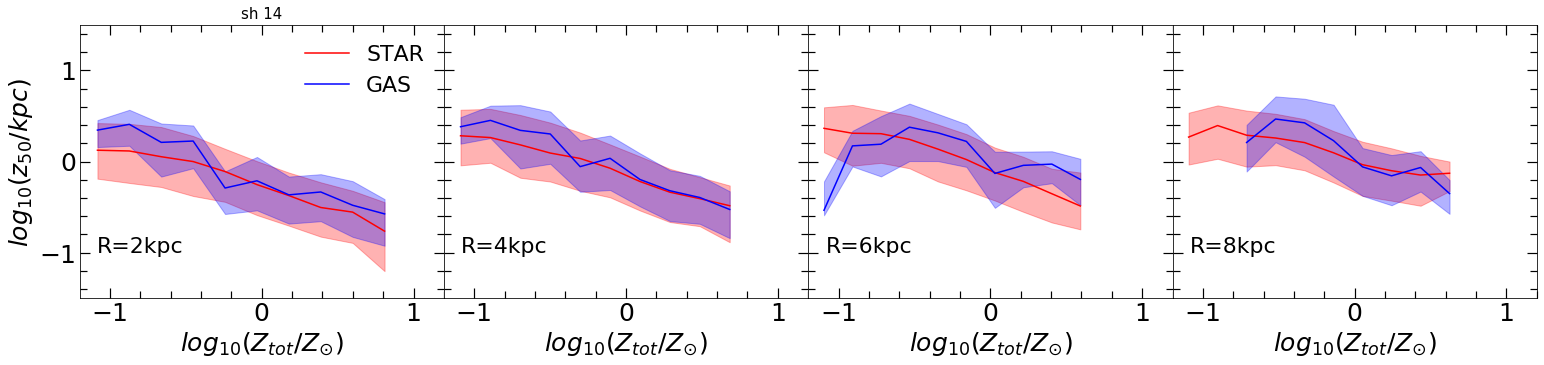

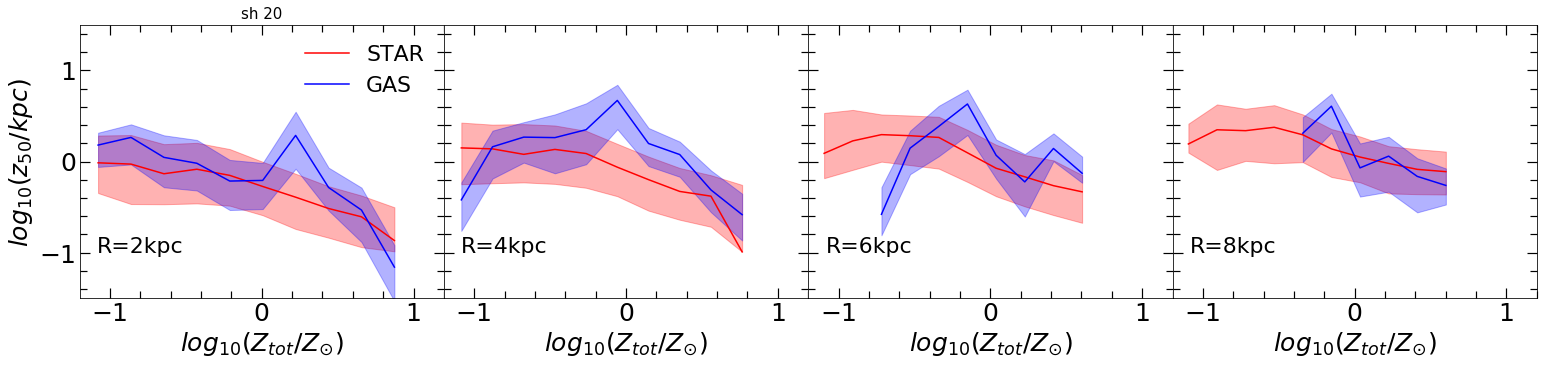

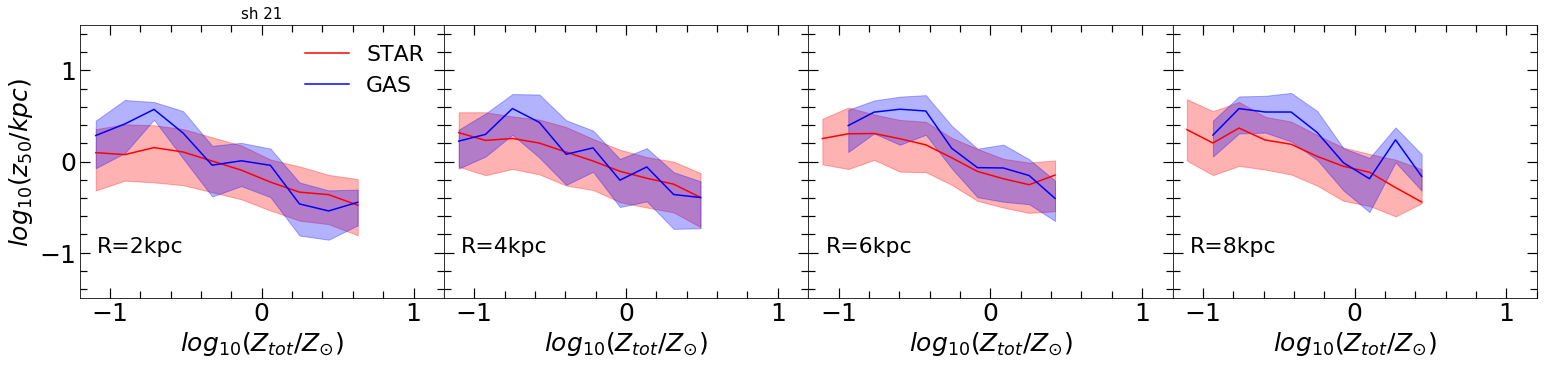

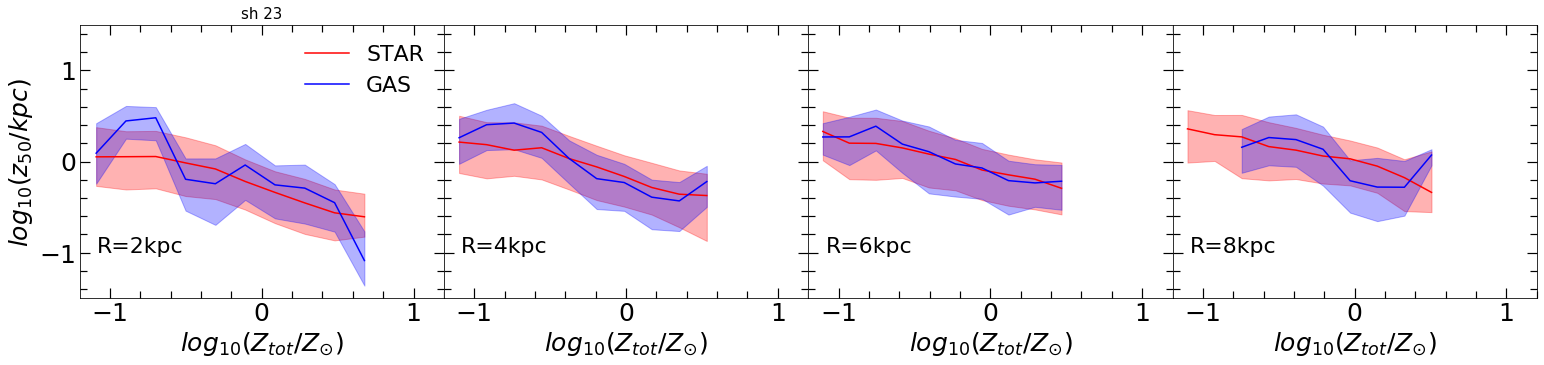

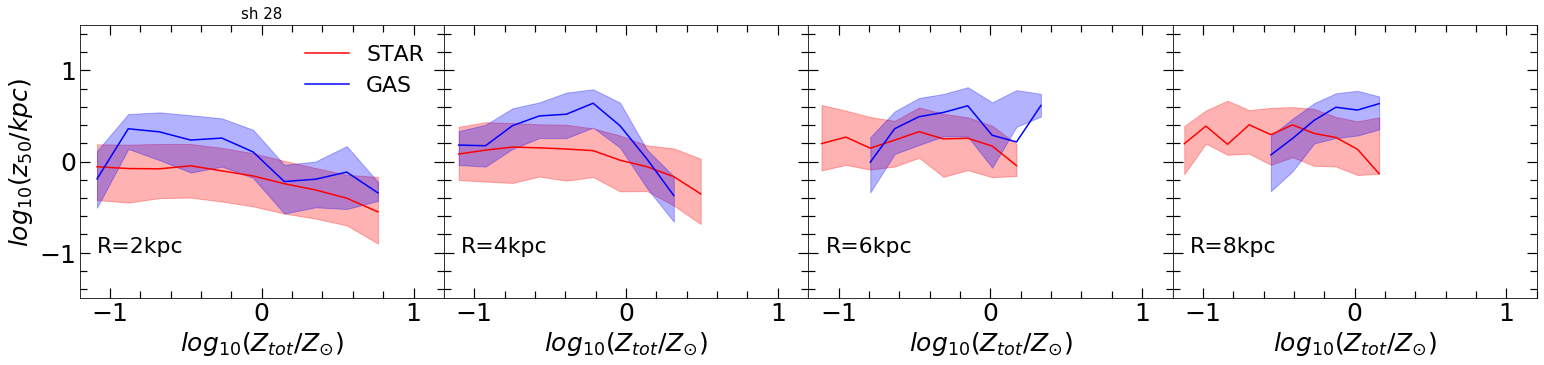

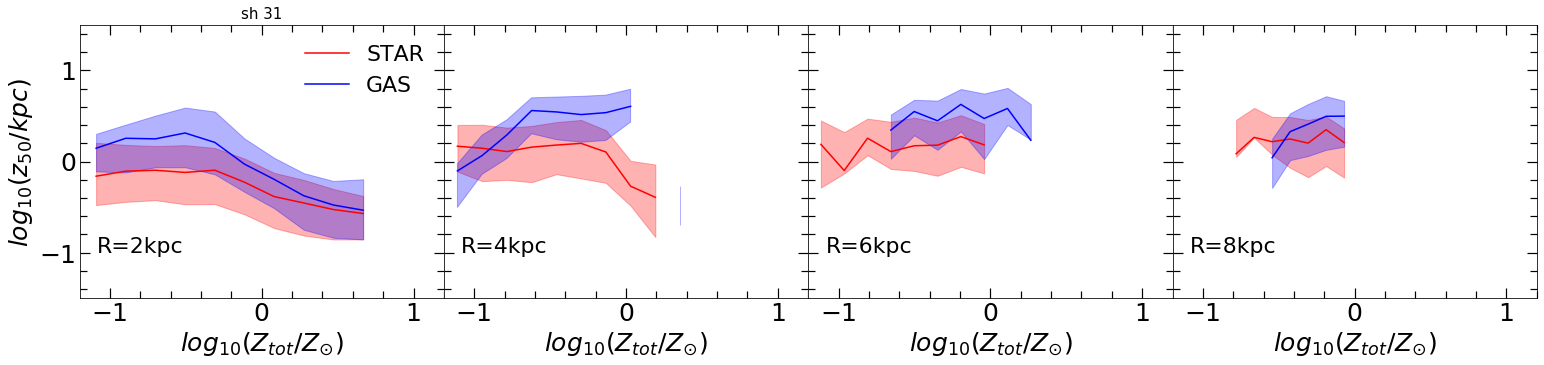

In [15]:
import matplotlib.pyplot as plt
import numpy as np

shID = np.loadtxt('../_data/my_halos.dat')[:,0]

p = (2,4,6,8)

for j in range(14):
    
    Id = ''
    for aux in list(str('%d'%shID[j]))[-2:]:
        Id += aux
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(22,5))
    fig.subplots_adjust(bottom=0.17, left =0.06, right = 0.98, top = 0.93, wspace=0., hspace= 0)
    
    for k in range(4):
    
        ## STARS

        data = np.loadtxt('../_data/z50_vs_met/z50_met_rad'+str('%s'%p[k])+'_sh_'+str('%d'%shID[j])+'.dat')
        met_str = data[:-1,0]
        z50_str = data[:-1,1]
        p25_str = data[:-1,4]
        p75_str = data[:-1,5]

        ## GAS
        points = np.loadtxt('../_data/gas_z50_vs_met/gas_z50met_rad'+str('%s'%p[k])+'_sh_'+str('%d'%shID[j])+'.dat')
        met_gas = points[:,0]
        z50_gas = points[:,1]
        p25_gas = points[:,2]
        p75_gas = points[:,3]

        ax[k].plot(np.log10(met_str),np.log10(z50_str),'-', color='r', label=r'STAR')
        ax[k].fill_between(np.log10(met_str),np.log10(p25_str),np.log10(p75_str),color='r',alpha=0.3)
        ax[k].plot(np.log10(met_gas),np.log10(z50_gas),'-', color='b', label=r'GAS')
        ax[k].fill_between(np.log10(met_gas),np.log10(p25_gas),np.log10(p75_gas),color='b',alpha=0.3)
        ax[k].set_xlim(-1.2,1.2)
        ax[k].text(-0.8,-1.,r'R='+str('%s'%p[k])+'kpc', fontsize=22,ha='center')

        ax[k].minorticks_on()
        ax[k].tick_params( labelsize=25)
        ax[k].tick_params('both', length=7, width=1.2,which='minor', direction='in', right='on',top='on')
        ax[k].tick_params('both', length=10, width=1.2,which='major', direction='in', right='on',top='on')
        ax[k].set_ylim(-1.5,1.5)

        ax[k].set_xlabel('$log_{10}(Z_{tot}/Z_{\odot})$',fontsize=25)

        if k == 0: 
            ax[k].set_title('sh '+Id,fontsize=15)
            ax[k].set_ylabel('$log_{10}(z_{50}/kpc)$',fontsize=25)
            ax[k].legend(fontsize=22,frameon=False)
            
        else: 
            ax[k].set_yticklabels([])

    plt.show()
    fig.savefig('../_imagenes/z50_met/z50_met_sh_'+str('%d'%shID[j])+'.png',dpi=100, xxbox_inches='tight')
    

### Perfil z50 para edades fijas. Estrellas z=0 y z = tform 

subhalo_127000000000002


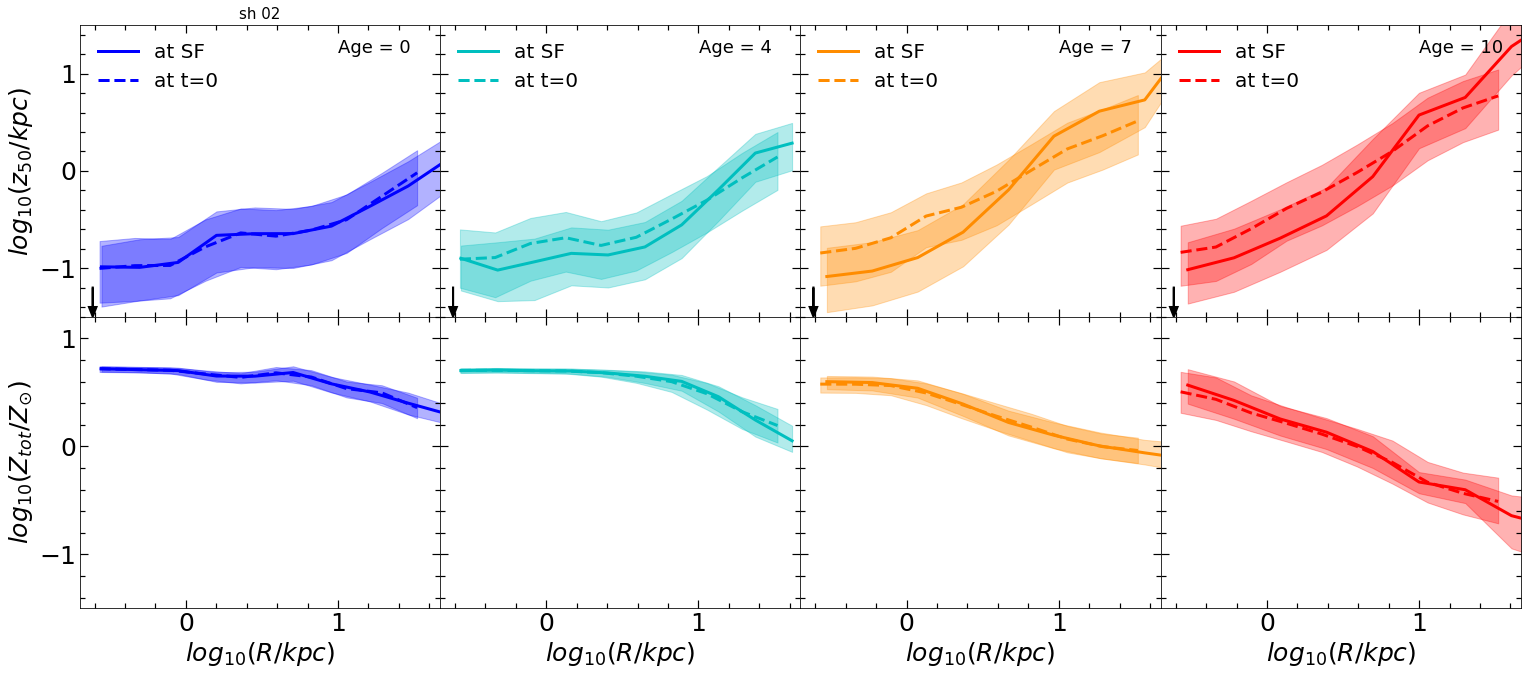

subhalo_127000000000003


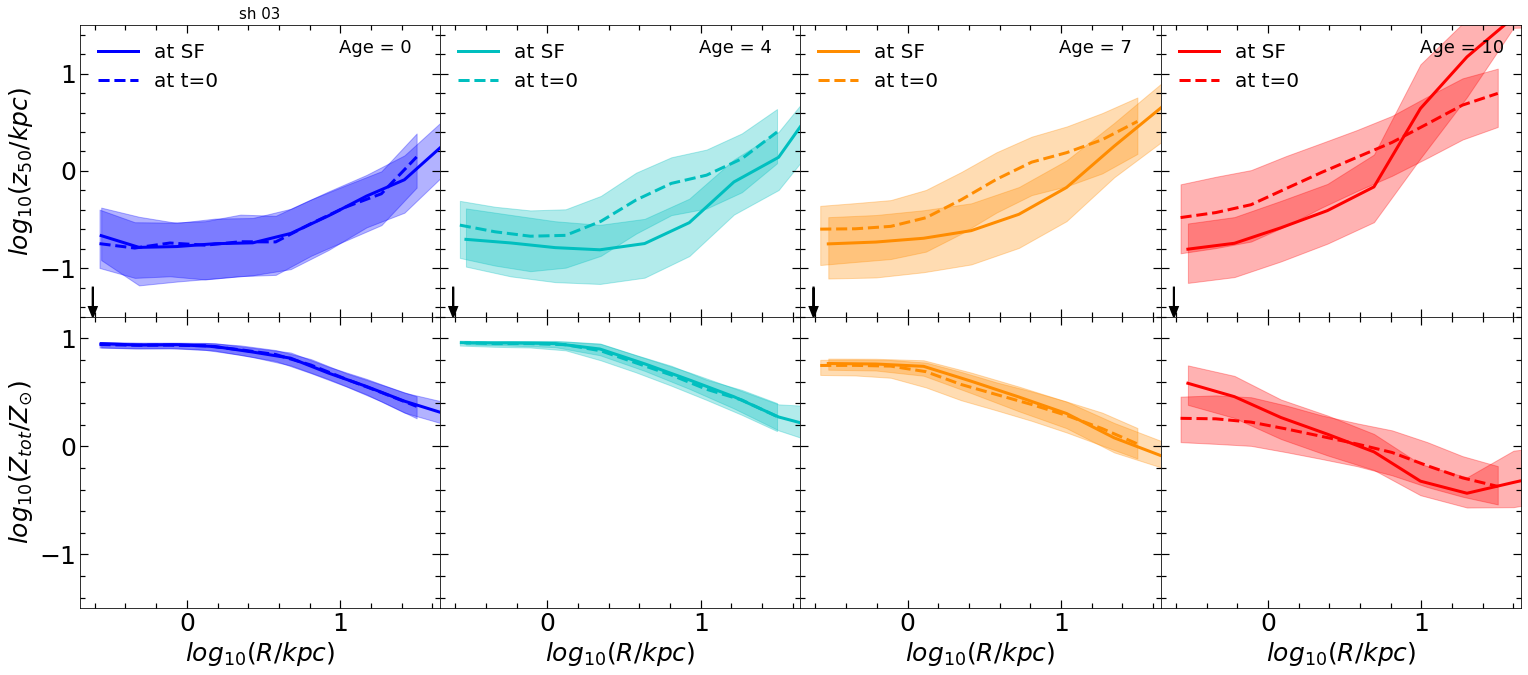

subhalo_127000000000004


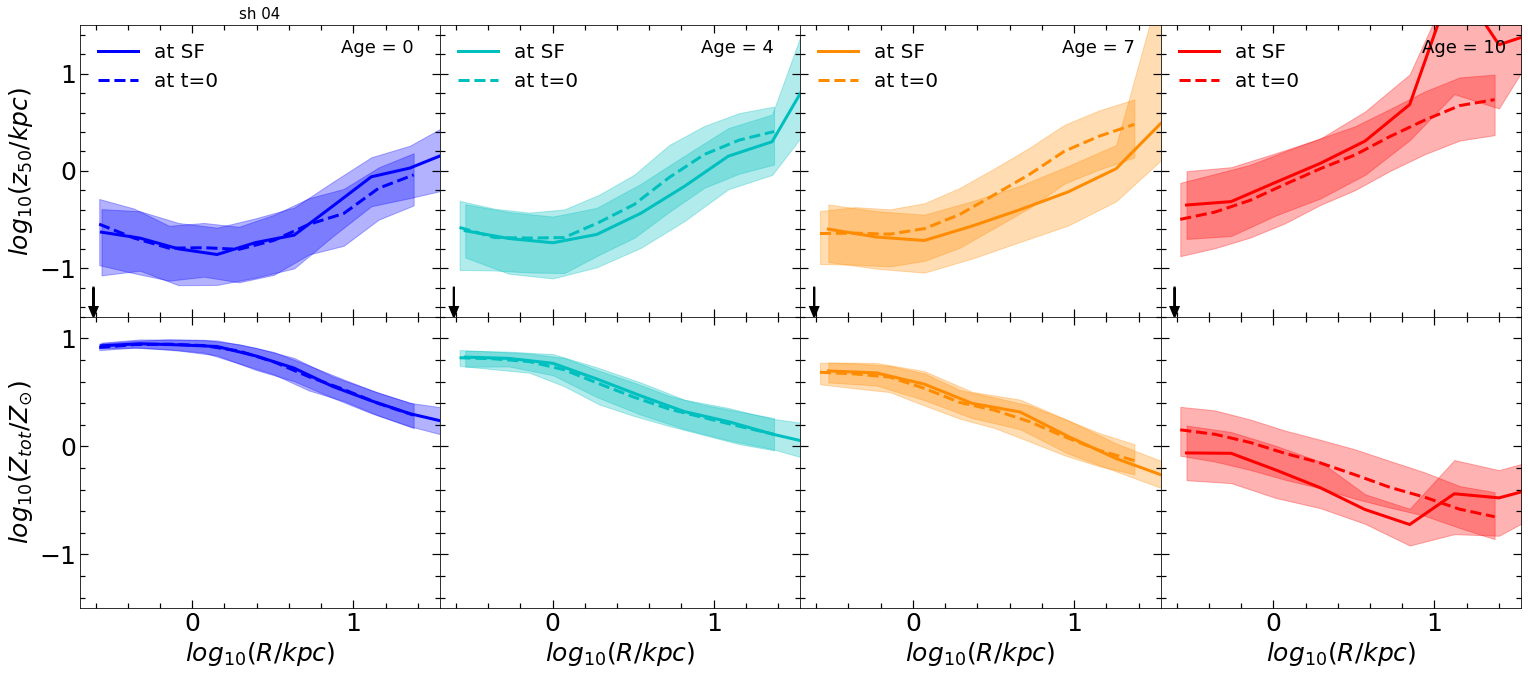

subhalo_127000000000006


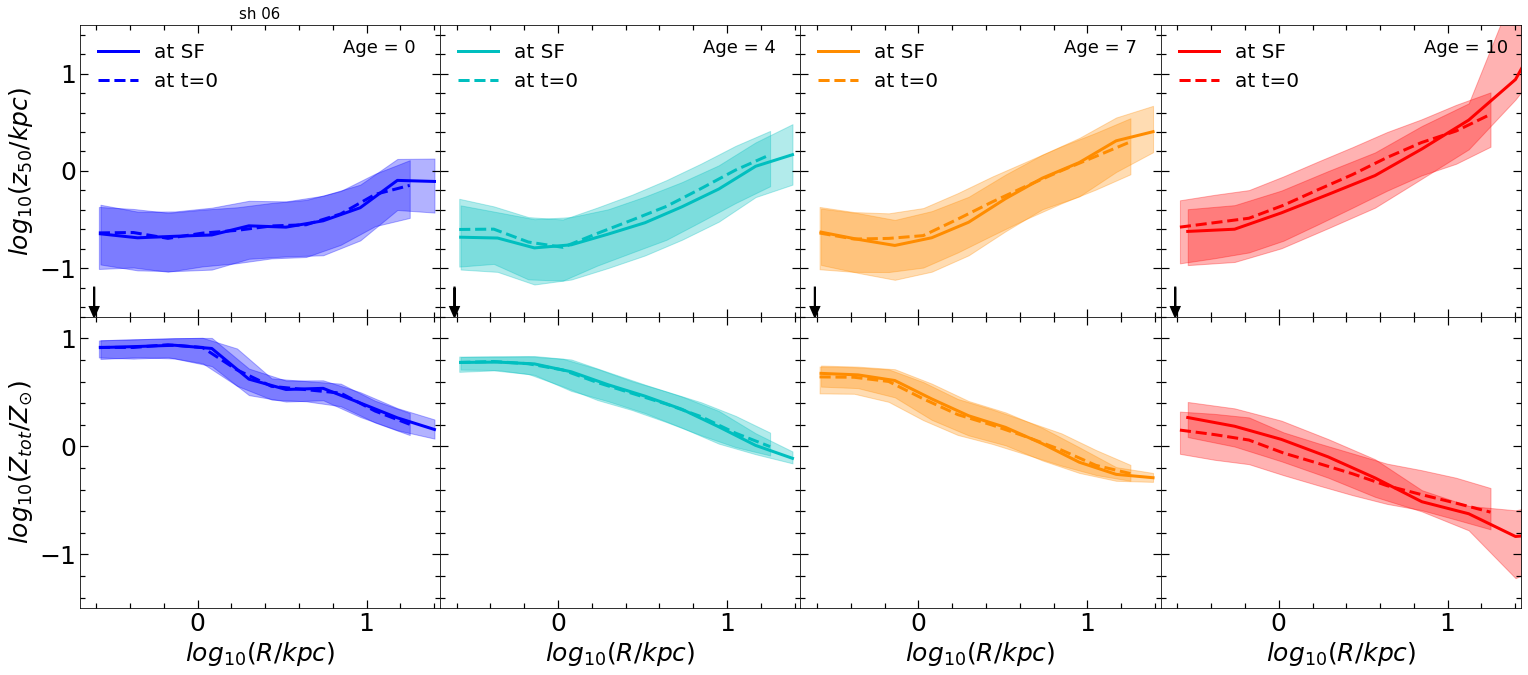

subhalo_127000000000007


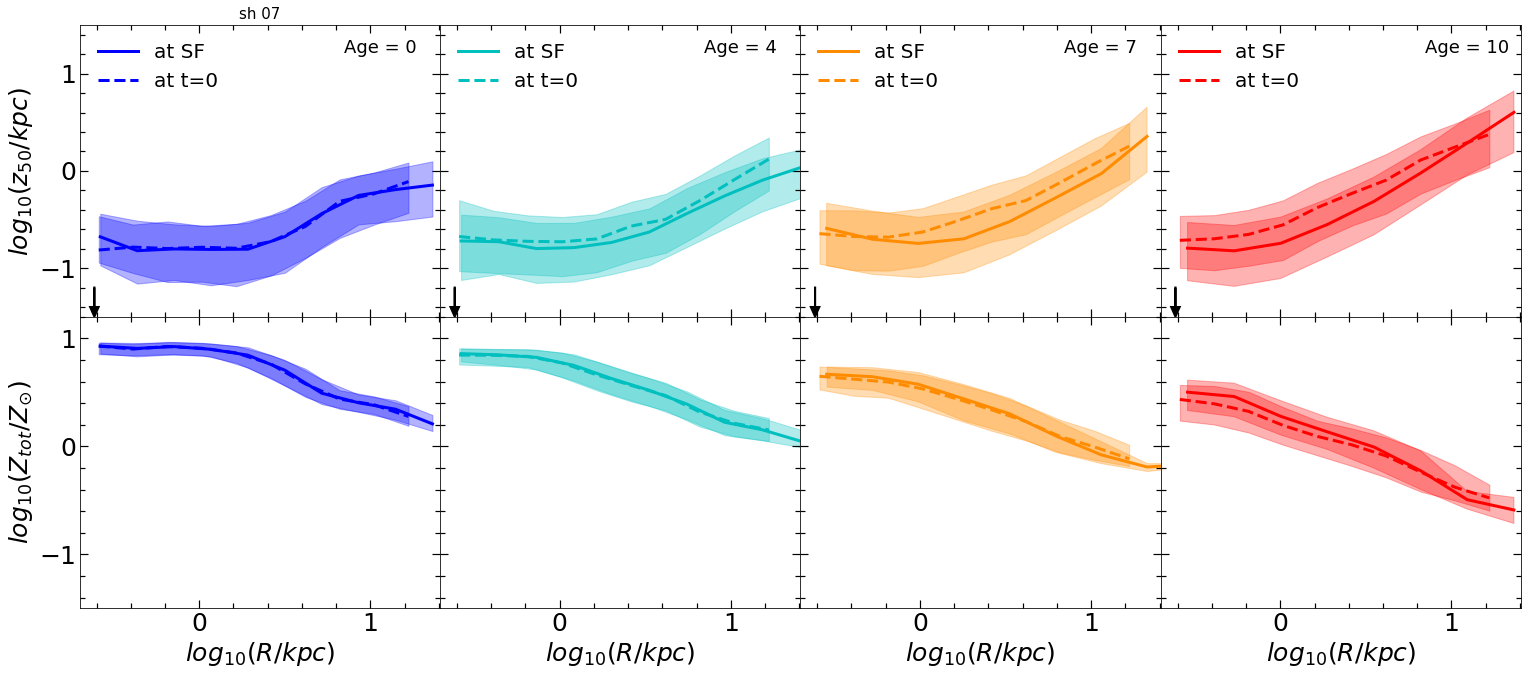

subhalo_127000000000009


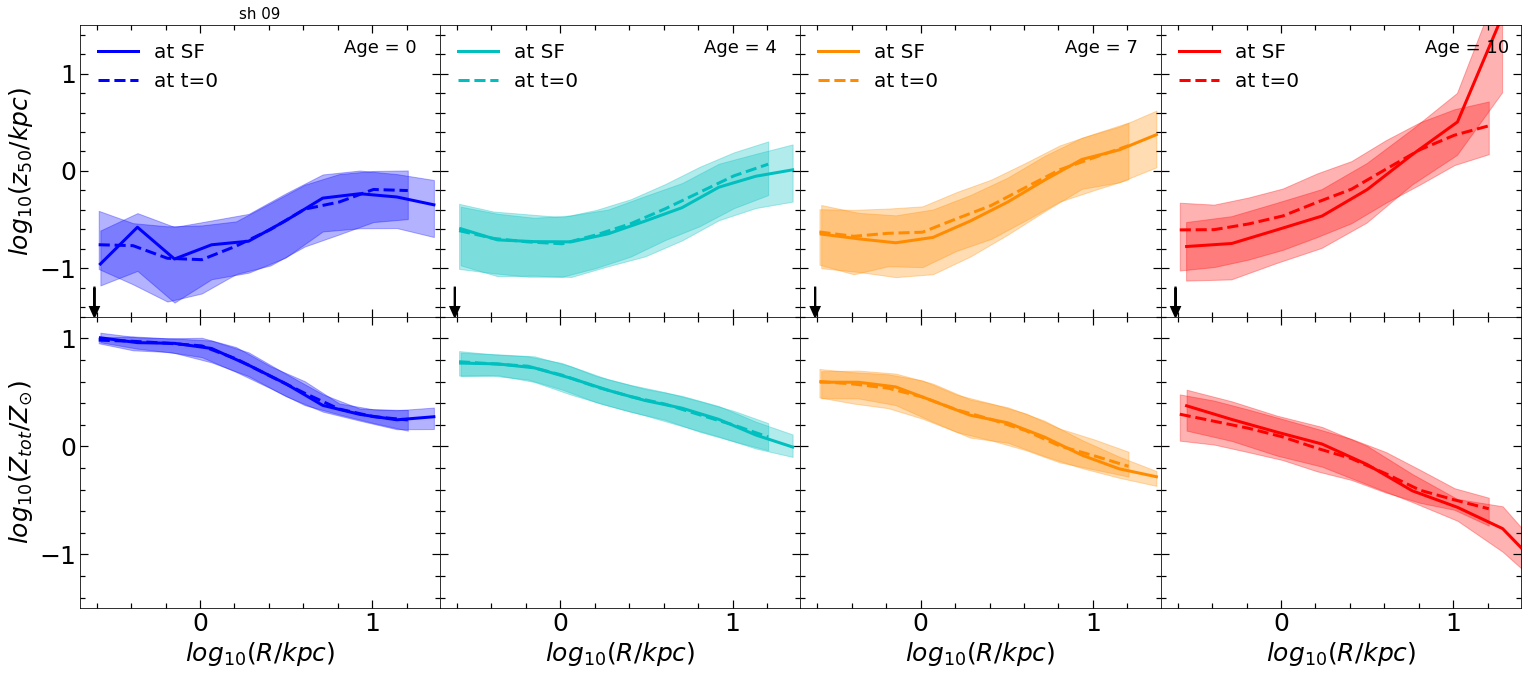

subhalo_127000000000012


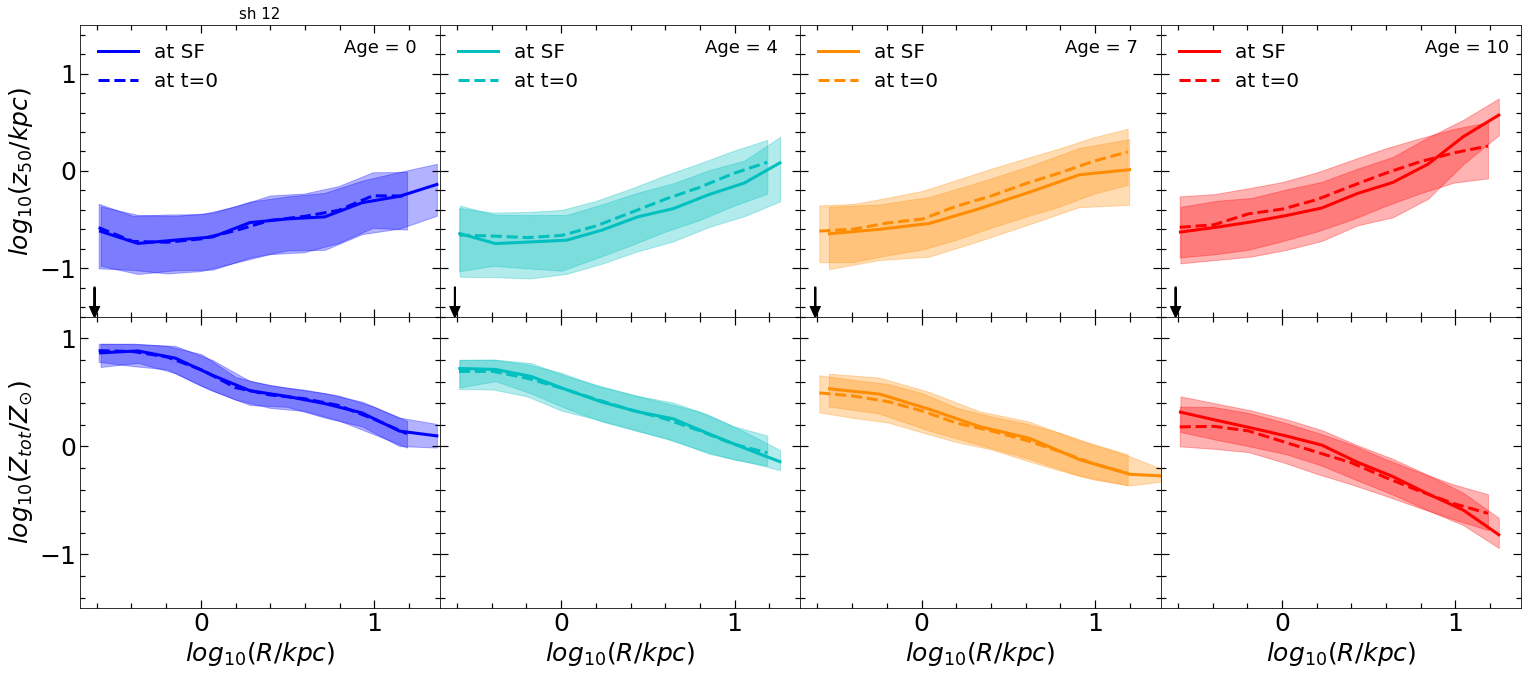

subhalo_127000000000011


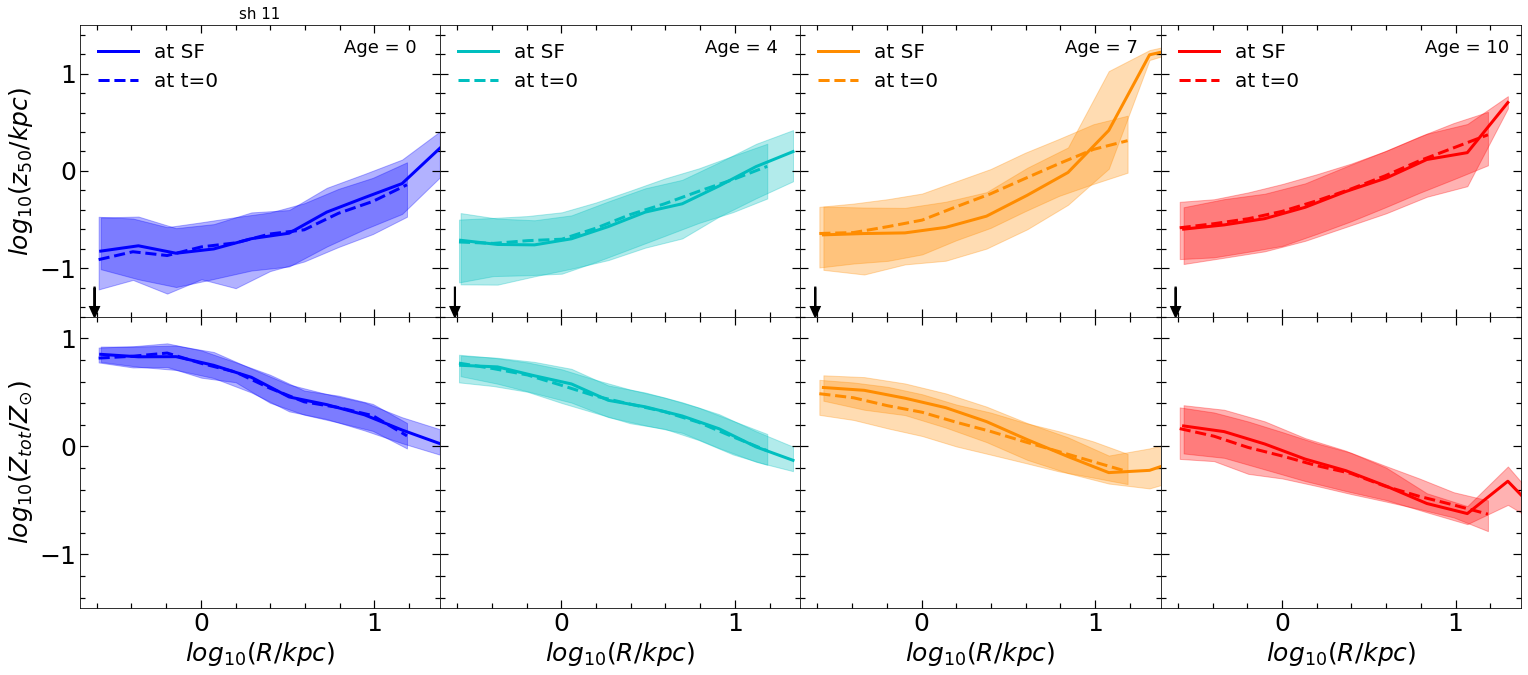

subhalo_127000000000014


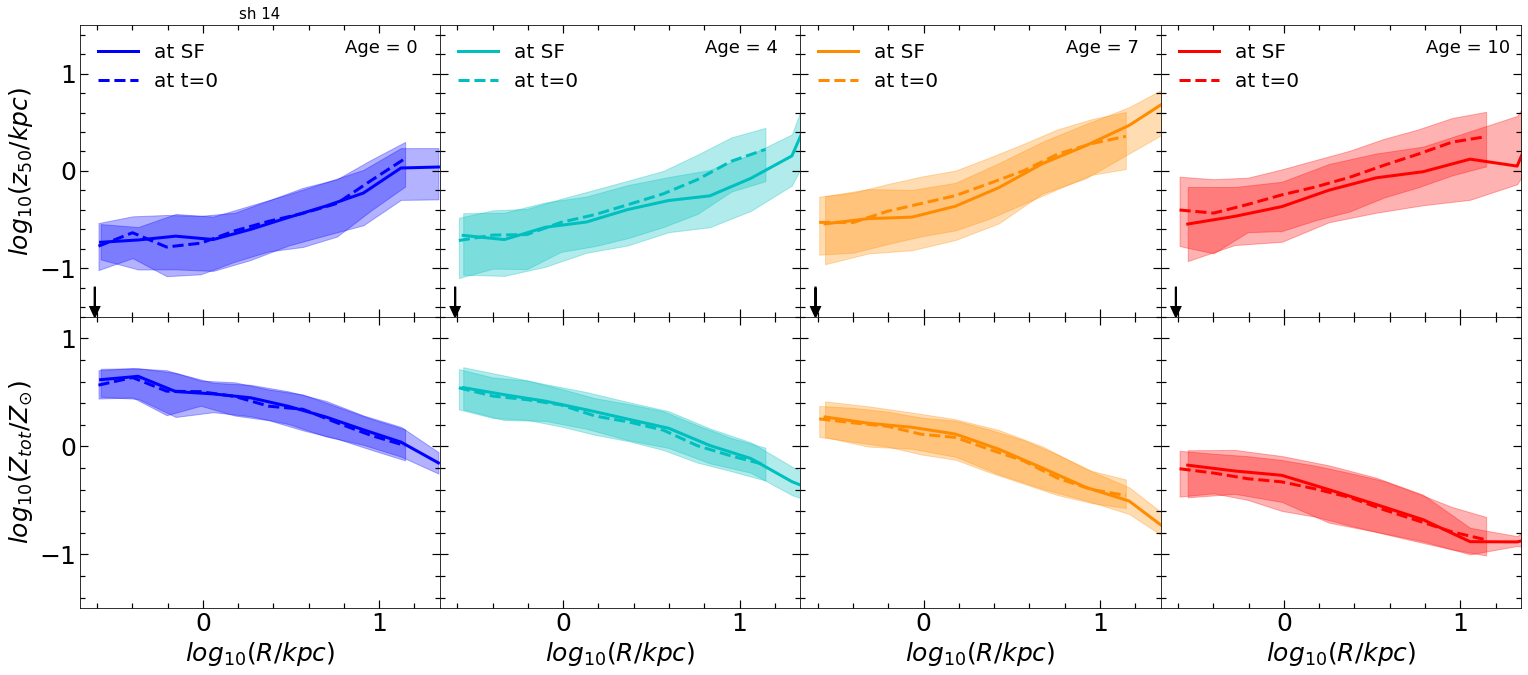

subhalo_127000000000020


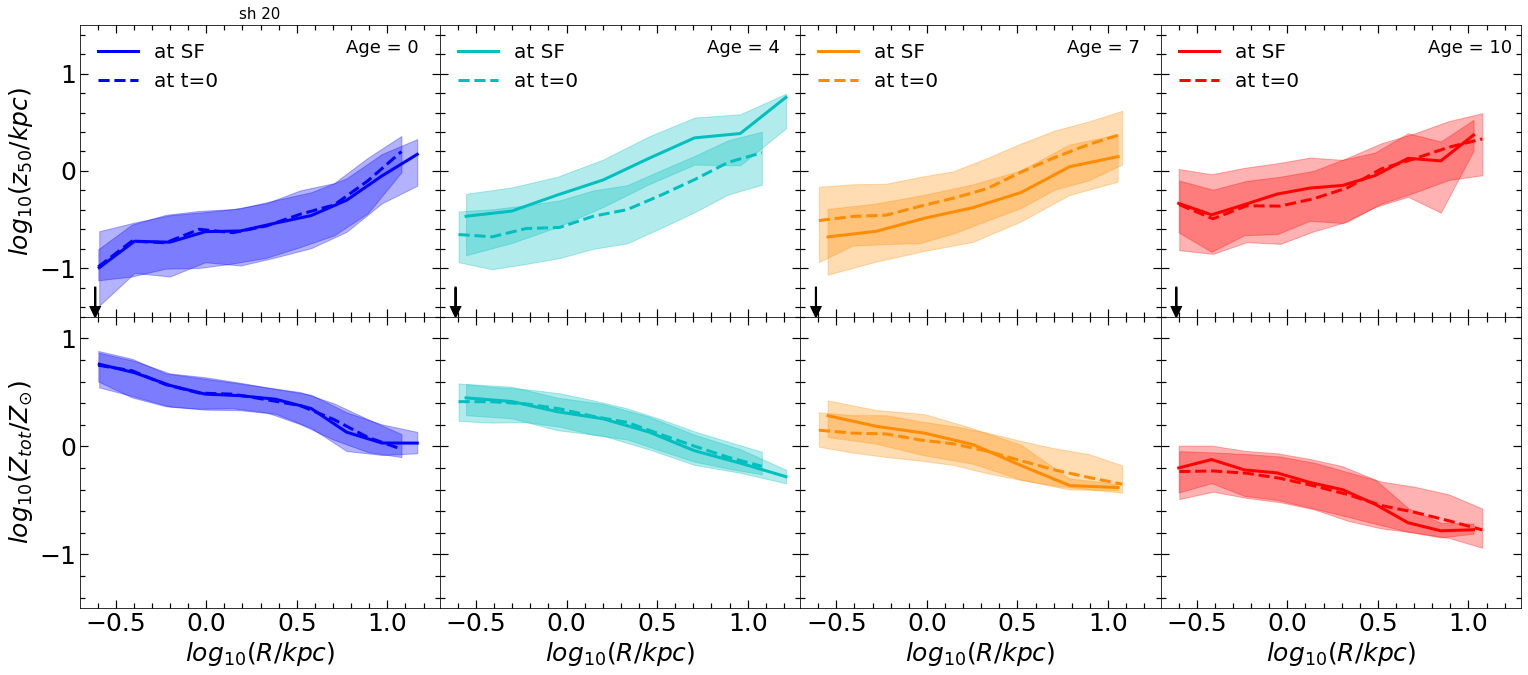

subhalo_127000000000021


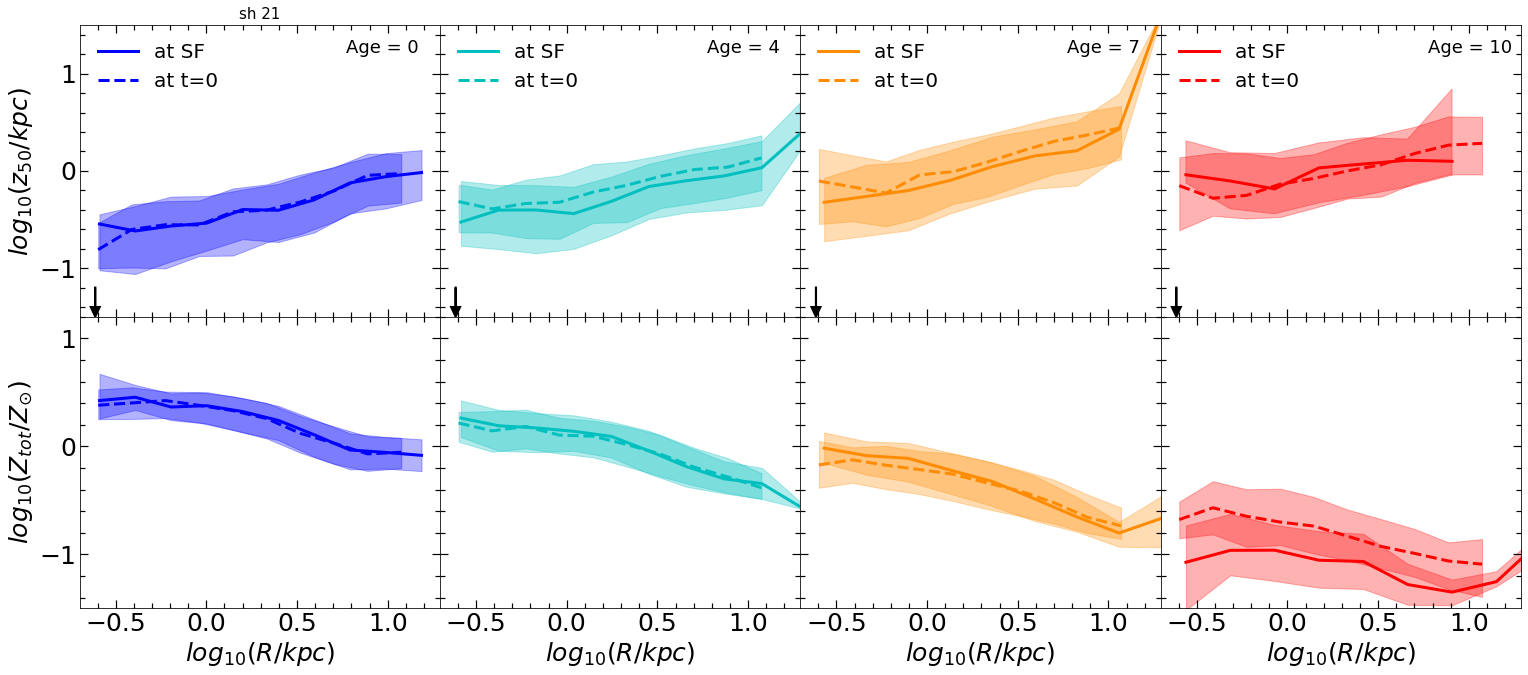

subhalo_127000000000023


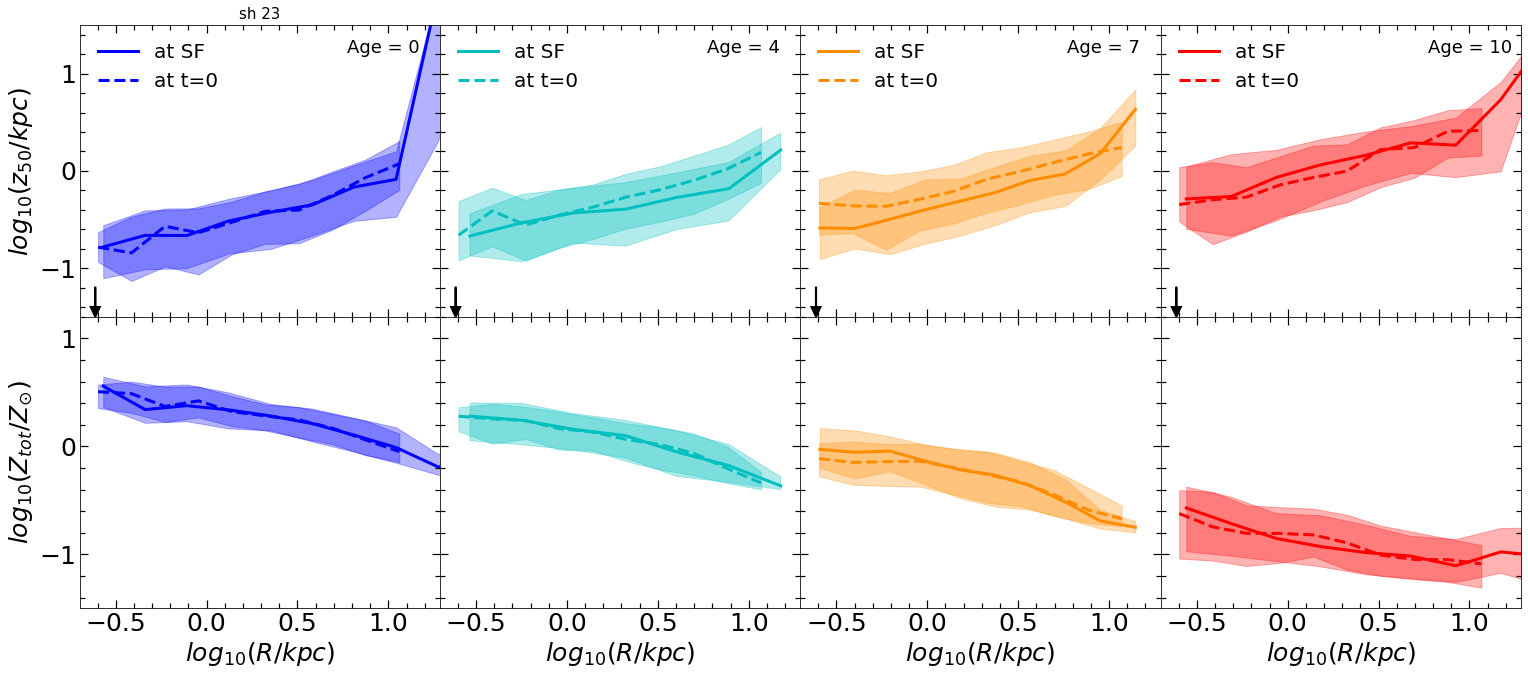

subhalo_127000000000028


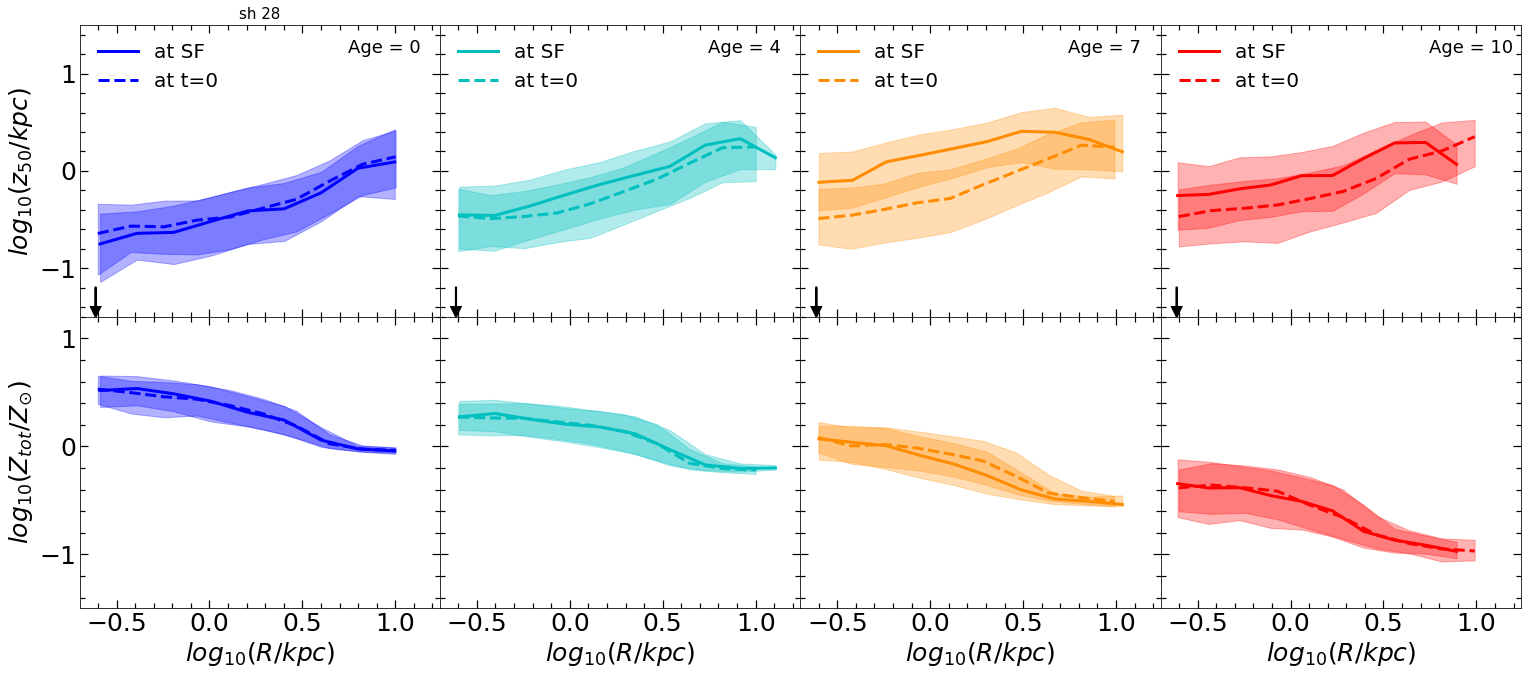

subhalo_127000000000031


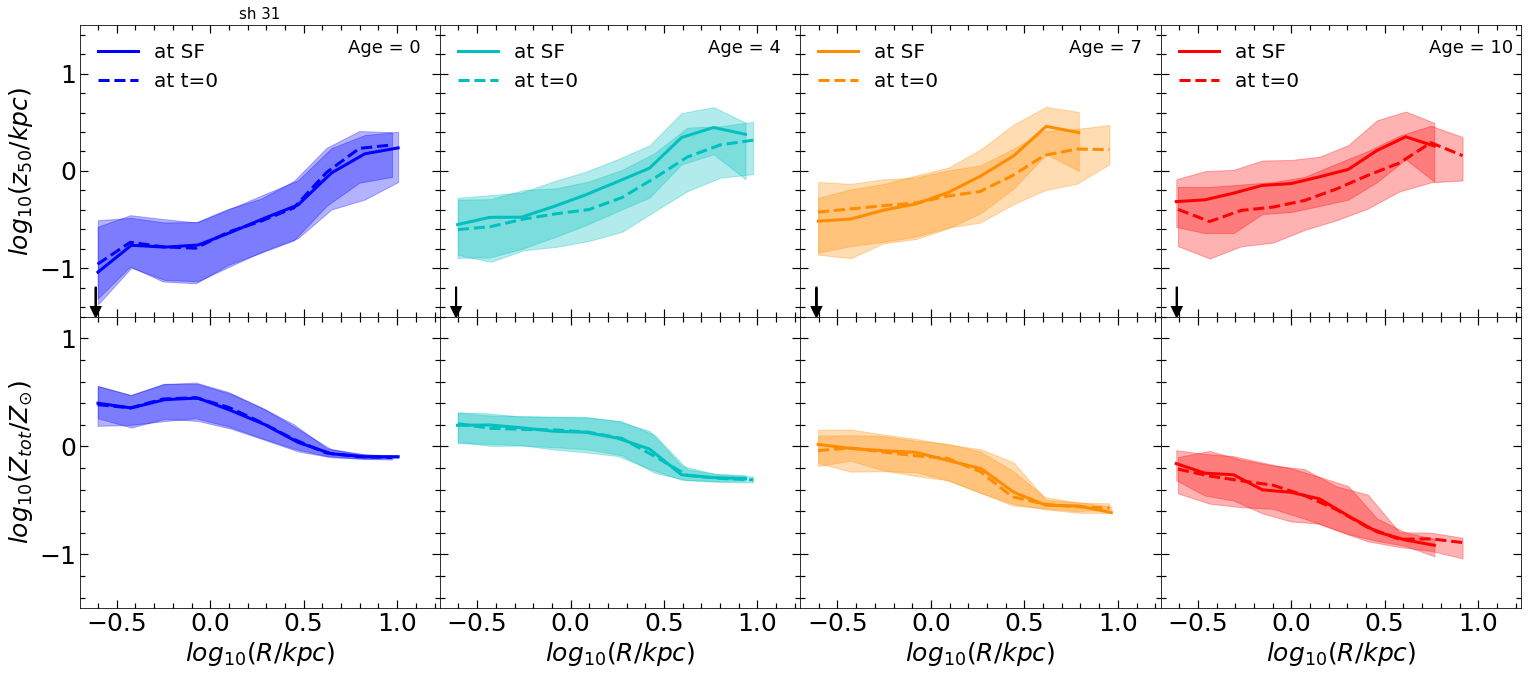

In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import z50 as scale_high
import metallicity_profile as metp
import rotation_mio as rot
import time_conversion as time

shID = np.loadtxt('../_data/my_halos.dat')[:,0]
path = '/store/erebos/omarioni/_simulations/snap_127/'

color = ('b','c','darkorange','r')
edades = (0,4,7,10)

for i in range(14):
    
    Id = ''
    for aux in list(str('%d'%shID[i]))[-2:]:
        Id += aux
        
    IDbin = np.loadtxt('../_data/ID_partxagebin/ID_pxab_sh_'+ str('%d'%shID[i]) +'.dat')
    num_bin = np.loadtxt('../_data/ID_partxagebin/npxab_sh'+ str('%d'%shID[i]) +'.dat', dtype='int')
    
    pos_part = np.loadtxt('../_data/pos_part_age/sft_snap_sh_'+ str('%d'%shID[i]) +'.dat')
    
    print('subhalo_'+str('%d'%shID[i]))
    
    ID_str = pos_part[:,0]
    x_str  = pos_part[:,1]    
    y_str  = pos_part[:,2]
    z_str  = pos_part[:,3]
    m_str  = pos_part[:,4]
    met_tf = pos_part[:,6]
    
    age_0  = np.isin(ID_str, IDbin[:num_bin[0]])
    age_4  = np.isin(ID_str, IDbin[num_bin[0]:num_bin[0]+ num_bin[1]])
    age_7  = np.isin(ID_str, IDbin[num_bin[0]+ num_bin[1]:num_bin[0]+ num_bin[1]+ num_bin[2]])
    age_10 = np.isin(ID_str, IDbin[num_bin[0]+ num_bin[1]+ num_bin[2]:num_bin[0]+ num_bin[1]+ num_bin[2]+num_bin[3]])
    
    Rstr = np.sqrt(x_str**2 + y_str**2)
    
    ages = np.array([age_0, age_4, age_7, age_10])
    
#-----------------------------------------------------------------------------------------------------------------
#AT z=0
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%shID[i])+'.h5py', 'r')
    
    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    met  = snap['/Str/Total_Metallicity'][()]
    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    aux2 = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    AGE  = np.max(aux2) - aux2 #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
    
    met_z0  = met[amask]/0.0127 #para pasarlo a metalicidad solar (ver Illustris data)

    xstr = pstr[amask,0] * aexp/h
    ystr = pstr[amask,1] * aexp/h
    zstr = pstr[amask,2] * aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[amask,0] * np.sqrt(aexp)
    v_y = vstr[amask,1] * np.sqrt(aexp)
    v_z = vstr[amask,2] * np.sqrt(aexp)

    mstr = mstr[amask] * 1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc, = np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr

    Rn_str = np.sqrt(xn_str**2 + yn_str**2)
    
    rn_str = np.sqrt(xn_str**2+yn_str**2+zn_str**2)
    
    corte, = np.where(rn_str < rgal)
    w0_z0, = np.where(met_z0[corte]>0)
    
    metalz0 = met_z0[corte][w0_z0]
    edad = AGE[corte][w0_z0]
    Rstr_z0 = Rn_str[corte][w0_z0]
    zstr_z0 = zn_str[corte][w0_z0]
    mstr_z0 = mstr[corte][w0_z0]
#---------------------------------------------------------------------------------------------
    #PLOT
    
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(22,10))
    fig.subplots_adjust(bottom=0.14, left =0.07, right = 0.98, top = 0.95, wspace=0., hspace= 0)
    
    for j in range(4):
        
        w0, = np.where(met_tf[ages[j]]>0)
        
        med_z, z50, nodos, p25_z, p75_z = scale_high.HMSH_log(
                Rstr[ages[j]][w0],
                z_str[ages[j]][w0],
                m_str[ages[j]][w0], 
                10,
        )
        
        med_m, Ztot, p25_m, p75_m = metp.met_log(
            Rstr[ages[j]][w0],
            np.log10(met_tf[ages[j]][w0]),
            10,
        )
        
        ages_cut, = np.where((edad > edades[j] - 0.5) & (edad < edades[j] + 0.5))

        
        med_z_z0, z50_z0, nodos_z0, p25_z_z0, p75_z_z0 = scale_high.HMSH_log(
                Rstr_z0[ages_cut],
                zstr_z0[ages_cut],
                mstr_z0[ages_cut], 
                10,
        )
        
        med_m_z0, Ztot_z0, p25_m_z0, p75_m_z0 = metp.met_log(
            Rstr_z0[ages_cut],
            np.log10(metalz0[ages_cut]),
            10,
        )
    
        ax[0,j].plot(np.log10(med_z),np.log10(z50),'-', color=color[j], label=r'at SF',lw=3)
        ax[0,j].fill_between(np.log10(med_z),np.log10(p25_z),np.log10(p75_z),color=color[j],alpha=0.3)
        ax[0,j].plot(np.log10(med_z_z0),np.log10(z50_z0),'--', color=color[j], label=r'at t=0',lw=3)
        ax[0,j].fill_between(np.log10(med_z_z0),np.log10(p25_z_z0),np.log10(p75_z_z0),color=color[j],alpha=0.3)
        ax[0,j].set_xticklabels([])
        ax[0,j].set_xlim(np.log10(0.2),np.log10(rgal+5))
        ax[0,j].set_ylim(-1.5,1.5)
        ax[0,j].text(0.6*np.log10(rgal+5),1.27,r'Age = '+str('%s'%edades[j]), fontsize=18,ha='left',va='center')
        ax[0,j].legend(frameon=False, loc=2,fontsize=20)
        ax[0,j].minorticks_on()
        ax[0,j].tick_params( labelsize=25)
        ax[0,j].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
        ax[0,j].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
        ax[0,j].arrow(np.log10(0.244),-1.2,0,-0.3,
            length_includes_head=True, head_width=0.05, head_length=0.1,
            lw=2,color='k')
        
        if j == 0: 
            ax[0,j].set_title('sh '+Id, fontsize=15)
            ax[0,j].set_ylabel('$log_{10}(z_{50}/kpc)$',fontsize=25)
            ax[1,j].set_ylabel('$log_{10}(Z_{tot}/Z_{\odot})$',fontsize=25)
        else: 
            ax[0,j].set_yticklabels([])
            ax[1,j].set_yticklabels([])
        
        ax[1,j].plot(np.log10(med_m),Ztot,'-', color=color[j],lw=3)
        ax[1,j].fill_between(np.log10(med_m),p25_m,p75_m,color=color[j],alpha=0.3)
        ax[1,j].plot(np.log10(med_m_z0),Ztot_z0,'--', color=color[j],lw=3)
        ax[1,j].fill_between(np.log10(med_m_z0),p25_m_z0,p75_m_z0,color=color[j],alpha=0.3)
        ax[1,j].set_xlim(np.log10(0.2),np.log10(rgal+5))
        ax[1,j].set_ylim(-1.5,1.2)
        ax[1,j].set_xlabel('$log_{10}(R/kpc)$',fontsize=25)
        ax[1,j].minorticks_on()
        ax[1,j].tick_params( labelsize=25)
        ax[1,j].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
        ax[1,j].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
        
    plt.show()
    fig.savefig('../_imagenes/z50_met_prof/z50_met_prof_sh_'+str('%d'%shID[i])+'.png',dpi=100, xxbox_inches='tight')
    